Iñigo Martin Melero

## Preprocesamiento Springate, Grover, Amat

### 0) Librerias

Importamos las librerias necesarias. Principalmente sklearn, pandas, numpy, matplotlib y seteamos la seed. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(51)

### 1) Creación Sets justos Bancarrota

Principalmente quitaremos los valores n.d. que estén en todas las databases, para hacer un Training justo. Lo hacemos en los databases de Bancarrota y de Activas. 

In [2]:
df_Ban_Spr_1=pd.read_csv('Springate_Bancarrota.csv',encoding = 'unicode_escape',sep=';')
print(df_Ban_Spr_1)

        ID Coef1_Springate Coef2_Springate Coef3_Springate Coef4_Springate  \
0        1          0.9525          0.0062          0.0054          3.9499   
1        2          0.6894          0.1641          0.3116          2.8739   
2        3          0.8671         -0.0479         -0.5388          2.0795   
3        4         -0.0034          0.0296         -0.2114          0.6265   
4        5          0.2916          0.0341          0.0534          0.3098   
...    ...             ...             ...             ...             ...   
1667  1668         -0.0017         -0.5964         -6.8264            n.d.   
1668  1669          0.1197         -8.2044         -7.3071            n.d.   
1669  1670       -127.9207         -0.9156         -0.0010            n.d.   
1670  1671          0.1915            n.d.            n.d.            n.d.   
1671  1672          0.7541        -14.6307         -0.5075            n.d.   

      Resultado  
0             1  
1             1  
2        

In [3]:
df_Ban_Gro_1=pd.read_csv('Grover_Bancarrota.csv',encoding = 'unicode_escape',sep=';')
print(df_Ban_Gro_1)

        ID Coef1_Grover Coef2_Grover Coef3_Grover  Resultado
0        1       0.9525       0.0062      -0.0150          1
1        2       0.6894       0.1641       0.1196          1
2        3       0.8671      -0.0479      -1.1645          1
3        4      -0.0034       0.0296      -0.1652          1
4        5       0.2916       0.0341       0.0299          1
...    ...          ...          ...          ...        ...
1667  1668      -0.0017      -0.5964      -0.4473          1
1668  1669       0.1197      -8.2044      -8.2046          1
1669  1670    -127.9207      -0.9156      -0.9156          1
1670  1671       0.1915         n.d.         n.d.          1
1671  1672       0.7541     -14.6307     -14.6307          1

[1672 rows x 5 columns]


In [4]:
df_Ban_Ama_1=pd.read_csv('Amat_Bancarrota.csv',encoding = 'unicode_escape',sep=';')
print(df_Ban_Ama_1)

        ID Coef1_Amat  Coef2_Amat Coef3_Amat Coef4_Amat  Resultado
0        1     1.0056      0.0064    -0.0150    -2.3367          1
1        2     1.7204      0.4234     0.1196     0.2824          1
2        3     0.4260     -1.4245    -1.1645     0.8174          1
3        4     0.4756      0.2109    -0.1652    -0.7833          1
4        5     0.9662      0.3709     0.0299     0.0807          1
...    ...        ...         ...        ...        ...        ...
1667  1668     9.7242      0.9126    -0.4473    -0.4901          1
1668  1669     0.6324     -9.0582    -8.2046     0.9058          1
1669  1670     0.0011   -943.6706    -0.9156     0.0010          1
1670  1671     0.1296     -2.2786       n.d.       n.d.          1
1671  1672     0.0347    -44.1666   -14.6307     0.3313          1

[1672 rows x 6 columns]


Creamos un set en Python para cada modelo (Springate, Grover, Amat) que contenga los IDs de las filas en las que haya algun n.d.
Luego, uniremos los 3 sets entre ellos para tener un mega set de indices a borrar en los tres datasets. 

In [5]:
df_nd_Ban_Cf1_Spr=df_Ban_Spr_1.index[df_Ban_Spr_1['Coef1_Springate'] == "n.d."].tolist()
print(df_nd_Ban_Cf1_Spr)
len(df_nd_Ban_Cf1_Spr)

[123, 481, 647, 801, 841, 976, 1013, 1044, 1089, 1143, 1147, 1174, 1199, 1231, 1243, 1261, 1279, 1283, 1330, 1371, 1394, 1434, 1450, 1459, 1460, 1474, 1503, 1508, 1513, 1514, 1515, 1525, 1530, 1554, 1560, 1573, 1580, 1591, 1603, 1609, 1611, 1614, 1633, 1640, 1647, 1649, 1658]


47

In [6]:
df_nd_Ban_Cf2_Spr=df_Ban_Spr_1.index[df_Ban_Spr_1['Coef2_Springate'] == "n.d."].tolist()
print(df_nd_Ban_Cf2_Spr)
len(df_nd_Ban_Cf2_Spr)

[1518, 1519, 1525, 1530, 1533, 1538, 1541, 1546, 1556, 1557, 1563, 1567, 1573, 1578, 1580, 1582, 1583, 1586, 1590, 1593, 1597, 1599, 1600, 1601, 1603, 1606, 1608, 1609, 1612, 1613, 1620, 1628, 1631, 1635, 1637, 1638, 1639, 1645, 1646, 1652, 1658, 1660, 1664, 1670]


44

In [7]:
df_nd_Ban_Cf3_Spr=df_Ban_Spr_1.index[df_Ban_Spr_1['Coef3_Springate'] == "n.d."].tolist()
print(df_nd_Ban_Cf3_Spr)
len(df_nd_Ban_Cf3_Spr)

[560, 973, 1427, 1475, 1512, 1518, 1519, 1525, 1530, 1533, 1538, 1541, 1546, 1556, 1557, 1563, 1567, 1573, 1575, 1578, 1580, 1582, 1586, 1597, 1599, 1600, 1601, 1603, 1606, 1609, 1611, 1612, 1613, 1614, 1620, 1626, 1628, 1631, 1635, 1636, 1637, 1638, 1639, 1645, 1646, 1652, 1658, 1660, 1664, 1670]


50

In [8]:
df_nd_Ban_Cf4_Spr=df_Ban_Spr_1.index[df_Ban_Spr_1['Coef4_Springate'] == "n.d."].tolist()
print(df_nd_Ban_Cf4_Spr)
len(df_nd_Ban_Cf4_Spr)

[764, 871, 1086, 1112, 1211, 1241, 1252, 1255, 1326, 1333, 1376, 1387, 1398, 1399, 1407, 1411, 1443, 1447, 1448, 1452, 1462, 1463, 1464, 1466, 1468, 1484, 1485, 1490, 1493, 1505, 1506, 1507, 1509, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645,

193

In [9]:
nd_Ban_Spr=set(df_nd_Ban_Cf1_Spr+df_nd_Ban_Cf2_Spr+df_nd_Ban_Cf3_Spr+df_nd_Ban_Cf4_Spr)
print(nd_Ban_Spr)
len(nd_Ban_Spr)

{1536, 1537, 1538, 1527, 1539, 1541, 1540, 1542, 1543, 1544, 1546, 1545, 1547, 1548, 1549, 1550, 1551, 1552, 1554, 1553, 1044, 1556, 1557, 1555, 1560, 1558, 1559, 1563, 1561, 1562, 1564, 1567, 1565, 1566, 1568, 1569, 1570, 1573, 1571, 1575, 1572, 1574, 1578, 1576, 1580, 1577, 1582, 1583, 560, 1579, 1586, 1581, 1584, 1585, 1590, 1591, 1587, 1593, 1588, 1589, 1592, 1597, 1086, 1599, 1600, 1089, 1601, 1603, 1595, 1596, 1606, 1598, 1608, 1609, 1602, 1611, 1612, 1613, 1614, 1607, 1610, 1615, 1616, 1617, 1620, 1618, 1619, 1621, 1112, 1622, 1626, 1623, 1628, 1624, 1625, 1631, 1627, 1633, 1629, 1635, 1636, 1637, 1638, 1639, 1640, 1632, 1634, 1641, 1642, 1645, 1646, 1647, 1643, 1649, 1644, 1648, 1652, 1650, 1651, 1143, 1653, 1654, 1658, 123, 1147, 1660, 1655, 1656, 1664, 1657, 1659, 1661, 1662, 1663, 1670, 647, 1665, 1666, 1667, 1668, 1669, 1671, 1174, 1199, 1211, 1231, 1241, 1243, 1252, 1255, 1630, 1261, 764, 1279, 1283, 801, 1326, 1330, 1333, 841, 1594, 1371, 1376, 871, 1387, 1394, 1398, 1399

225

In [10]:
df_nd_Ban_Cf1_Gro=df_Ban_Gro_1.index[df_Ban_Gro_1['Coef1_Grover'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf1_Gro))
df_nd_Ban_Cf2_Gro=df_Ban_Gro_1.index[df_Ban_Gro_1['Coef2_Grover'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf2_Gro))
df_nd_Ban_Cf3_Gro=df_Ban_Gro_1.index[df_Ban_Gro_1['Coef3_Grover'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf3_Gro))
nd_Ban_Gro=set(df_nd_Ban_Cf1_Gro+df_nd_Ban_Cf2_Gro+df_nd_Ban_Cf3_Gro)
print(nd_Ban_Gro)
len(nd_Ban_Gro)

47
44
41
{1538, 1541, 1546, 1554, 1044, 1556, 1557, 1560, 1563, 1567, 1573, 1578, 1580, 1582, 1583, 1586, 1590, 1591, 1593, 1597, 1599, 1600, 1089, 1601, 1603, 1606, 1608, 1609, 1611, 1612, 1613, 1614, 1620, 1628, 1631, 1633, 1635, 1636, 1637, 1638, 1639, 1640, 1645, 1646, 1647, 1649, 1652, 1143, 1658, 123, 1147, 1660, 1664, 1670, 647, 1174, 1199, 1231, 1243, 1261, 1279, 1283, 801, 1330, 841, 1371, 1394, 1434, 1450, 1459, 1460, 1474, 976, 1503, 481, 1508, 1513, 1514, 1515, 1518, 1519, 1013, 1525, 1530, 1533}


85

In [11]:
df_nd_Ban_Cf1_Ama=df_Ban_Ama_1.index[df_Ban_Ama_1['Coef1_Amat'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf1_Ama))
df_nd_Ban_Cf2_Ama=df_Ban_Ama_1.index[df_Ban_Ama_1['Coef2_Amat'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf2_Ama))
df_nd_Ban_Cf3_Ama=df_Ban_Ama_1.index[df_Ban_Ama_1['Coef3_Amat'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf3_Ama))
df_nd_Ban_Cf4_Ama=df_Ban_Ama_1.index[df_Ban_Ama_1['Coef4_Amat'] == "n.d."].tolist()
print(len(df_nd_Ban_Cf4_Ama))
nd_Ban_Ama=set(df_nd_Ban_Cf1_Ama+df_nd_Ban_Cf2_Ama+df_nd_Ban_Cf3_Ama+df_nd_Ban_Cf4_Ama)
print(nd_Ban_Ama)
len(nd_Ban_Ama)

27
0
41
41
{1664, 1282, 1283, 1538, 1541, 1670, 1546, 1530, 1427, 1556, 1557, 1560, 1563, 1567, 1573, 1575, 1578, 1580, 1582, 560, 1330, 1587, 1586, 1597, 1599, 1600, 1601, 1474, 1475, 1603, 1606, 1608, 1609, 1611, 1612, 973, 1614, 1613, 1620, 1626, 1628, 1631, 1635, 1636, 1637, 1638, 1639, 1512, 1385, 1645, 1518, 1519, 1646, 1649, 1523, 1652, 1525, 1658, 1660, 1533}


60

In [12]:
nd_Ban_Tot=sorted(nd_Ban_Spr.union(nd_Ban_Gro.union(nd_Ban_Ama)))
print(nd_Ban_Tot)
len(nd_Ban_Tot)

[123, 481, 560, 647, 764, 801, 841, 871, 973, 976, 1013, 1044, 1086, 1089, 1112, 1143, 1147, 1174, 1199, 1211, 1231, 1241, 1243, 1252, 1255, 1261, 1279, 1282, 1283, 1326, 1330, 1333, 1371, 1376, 1385, 1387, 1394, 1398, 1399, 1407, 1411, 1427, 1434, 1443, 1447, 1448, 1450, 1452, 1459, 1460, 1462, 1463, 1464, 1466, 1468, 1474, 1475, 1484, 1485, 1490, 1493, 1503, 1505, 1506, 1507, 1508, 1509, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1

227

In [13]:
df_Ban_Spr_2=df_Ban_Spr_1.drop(nd_Ban_Tot)
df_Ban_Spr_2["Coef1_Springate"]=df_Ban_Spr_2["Coef1_Springate"].astype(float)
df_Ban_Spr_2["Coef2_Springate"]=df_Ban_Spr_2["Coef2_Springate"].astype(float)
df_Ban_Spr_2["Coef3_Springate"]=df_Ban_Spr_2["Coef3_Springate"].astype(float)
df_Ban_Spr_2["Coef4_Springate"]=df_Ban_Spr_2["Coef4_Springate"].astype(float)
print(df_Ban_Spr_2)

        ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0        1           0.9525           0.0062           0.0054   
1        2           0.6894           0.1641           0.3116   
2        3           0.8671          -0.0479          -0.5388   
3        4          -0.0034           0.0296          -0.2114   
4        5           0.2916           0.0341           0.0534   
...    ...              ...              ...              ...   
1501  1502          -0.0555          -0.3837          -0.3051   
1502  1503           0.0061          -0.4382          -1.0570   
1504  1505           0.8625         -24.6623          -6.1772   
1510  1511          -2.2275          -0.0105          -0.0031   
1511  1512          -0.9579          -0.1787          -0.0904   

      Coef4_Springate  Resultado  
0              3.9499          1  
1              2.8739          1  
2              2.0795          1  
3              0.6265          1  
4              0.3098          1  
...      

In [14]:
df_Ban_Gro_2=df_Ban_Gro_1.drop(nd_Ban_Tot)
df_Ban_Gro_2["Coef1_Grover"]=df_Ban_Gro_2["Coef1_Grover"].astype(float)
df_Ban_Gro_2["Coef2_Grover"]=df_Ban_Gro_2["Coef2_Grover"].astype(float)
df_Ban_Gro_2["Coef3_Grover"]=df_Ban_Gro_2["Coef3_Grover"].astype(float)
print(df_Ban_Gro_2)

        ID  Coef1_Grover  Coef2_Grover  Coef3_Grover  Resultado
0        1        0.9525        0.0062       -0.0150          1
1        2        0.6894        0.1641        0.1196          1
2        3        0.8671       -0.0479       -1.1645          1
3        4       -0.0034        0.0296       -0.1652          1
4        5        0.2916        0.0341        0.0299          1
...    ...           ...           ...           ...        ...
1501  1502       -0.0555       -0.3837       -0.3842          1
1502  1503        0.0061       -0.4382       -0.4123          1
1504  1505        0.8625      -24.6623      -24.8344          1
1510  1511       -2.2275       -0.0105       -0.0105          1
1511  1512       -0.9579       -0.1787       -0.1787          1

[1445 rows x 5 columns]


In [15]:
df_Ban_Ama_2=df_Ban_Ama_1.drop(nd_Ban_Tot)
df_Ban_Ama_2["Coef1_Amat"]=df_Ban_Ama_2["Coef1_Amat"].astype(float)
df_Ban_Ama_2["Coef2_Amat"]=df_Ban_Ama_2["Coef2_Amat"].astype(float)
df_Ban_Ama_2["Coef3_Amat"]=df_Ban_Ama_2["Coef3_Amat"].astype(float)
df_Ban_Ama_2["Coef4_Amat"]=df_Ban_Ama_2["Coef4_Amat"].astype(float)
print(df_Ban_Ama_2)

        ID  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  Resultado
0        1      1.0056      0.0064     -0.0150     -2.3367          1
1        2      1.7204      0.4234      0.1196      0.2824          1
2        3      0.4260     -1.4245     -1.1645      0.8174          1
3        4      0.4756      0.2109     -0.1652     -0.7833          1
4        5      0.9662      0.3709      0.0299      0.0807          1
...    ...         ...         ...         ...         ...        ...
1501  1502      0.7084     -0.2591     -0.3842      1.4825          1
1502  1503      0.7955     -1.6397     -0.4123      0.2515          1
1504  1505      0.2487     -9.1522    -24.8344      2.7135          1
1510  1511      0.2941     -2.3456     -0.0105      0.0045          1
1511  1512      0.0054     -0.9775     -0.1787      0.1828          1

[1445 rows x 6 columns]


In [16]:
df_Ban_Tot_nd=pd.concat([df_Ban_Spr_2,df_Ban_Gro_2, df_Ban_Ama_2], axis=1)
df_Ban_Tot_nd.columns=['ID', 'Coef1_Springate', 'Coef2_Springate', 'Coef3_Springate', 'Coef4_Springate','Resultado_Springate','ID_Grover', 'Coef1_Grover', 'Coef2_Grover', 'Coef3_Grover','Resultado_Grover','ID_Amat', 'Coef1_Amat', 'Coef2_Amat', 'Coef3_Amat', 'Coef4_Amat','Resultado']
df_Ban_Tot_nd=df_Ban_Tot_nd.drop(df_Ban_Tot_nd.columns[[5,6,10,11]], axis=1)
print(df_Ban_Tot_nd)

        ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0        1           0.9525           0.0062           0.0054   
1        2           0.6894           0.1641           0.3116   
2        3           0.8671          -0.0479          -0.5388   
3        4          -0.0034           0.0296          -0.2114   
4        5           0.2916           0.0341           0.0534   
...    ...              ...              ...              ...   
1501  1502          -0.0555          -0.3837          -0.3051   
1502  1503           0.0061          -0.4382          -1.0570   
1504  1505           0.8625         -24.6623          -6.1772   
1510  1511          -2.2275          -0.0105          -0.0031   
1511  1512          -0.9579          -0.1787          -0.0904   

      Coef4_Springate  Coef1_Grover  Coef2_Grover  Coef3_Grover  Coef1_Amat  \
0              3.9499        0.9525        0.0062       -0.0150      1.0056   
1              2.8739        0.6894        0.1641        0.11

In [17]:
df_Ban_Tot_nd=df_Ban_Tot_nd.drop(df_Ban_Tot_nd.columns[[5, 6, 7]], axis=1)
print(df_Ban_Tot_nd)

        ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0        1           0.9525           0.0062           0.0054   
1        2           0.6894           0.1641           0.3116   
2        3           0.8671          -0.0479          -0.5388   
3        4          -0.0034           0.0296          -0.2114   
4        5           0.2916           0.0341           0.0534   
...    ...              ...              ...              ...   
1501  1502          -0.0555          -0.3837          -0.3051   
1502  1503           0.0061          -0.4382          -1.0570   
1504  1505           0.8625         -24.6623          -6.1772   
1510  1511          -2.2275          -0.0105          -0.0031   
1511  1512          -0.9579          -0.1787          -0.0904   

      Coef4_Springate  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  \
0              3.9499      1.0056      0.0064     -0.0150     -2.3367   
1              2.8739      1.7204      0.4234      0.1196      0.2824   


In [18]:
z1 = [decimal.Decimal(i) / decimal.Decimal(10) for i in range(-70, 70)]

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7564076599191032, 400)

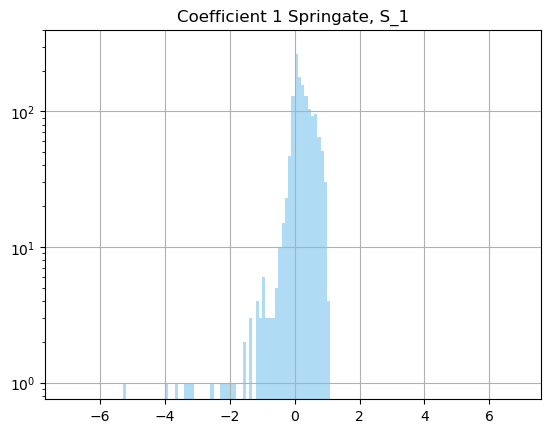

In [19]:
ax = df_Ban_Tot_nd['Coef1_Springate'].hist(bins=z1,color='#AFDBF5').set_title("Coefficient 1 Springate, S_1")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7430376499737534, 400)

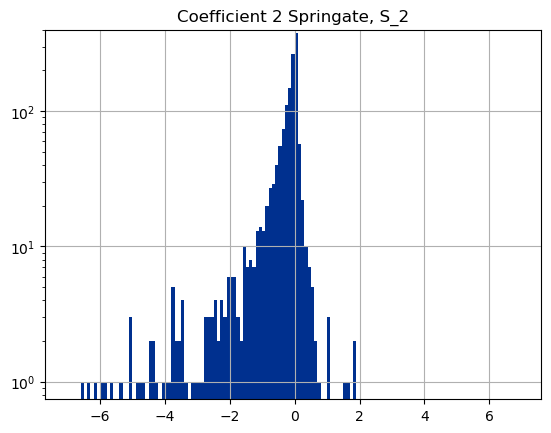

In [20]:
ax = df_Ban_Tot_nd['Coef2_Springate'].hist(bins=z1,color='#00308F').set_title("Coefficient 2 Springate, S_2")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7589095756701538, 400)

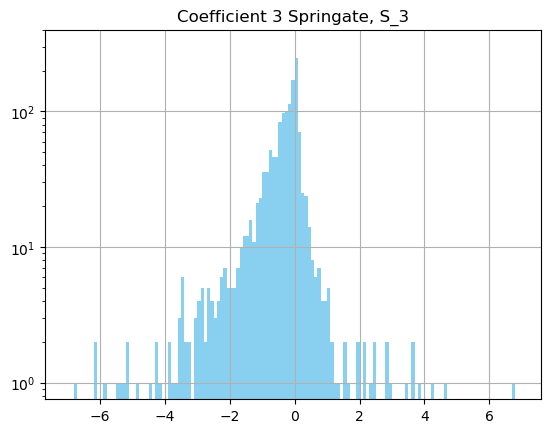

In [21]:
ax = df_Ban_Tot_nd['Coef3_Springate'].hist(bins=z1,color='#89CFF0').set_title("Coefficient 3 Springate, S_3")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7839761166732082, 400)

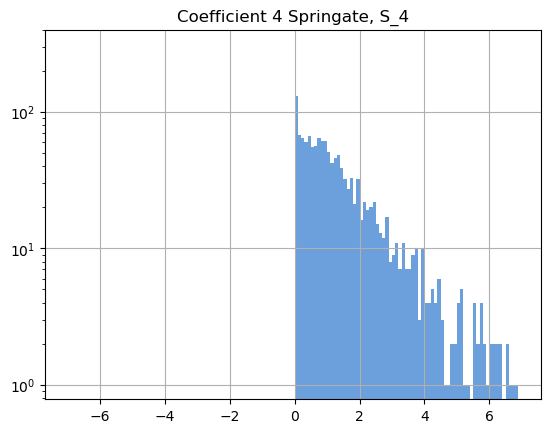

In [22]:
ax = df_Ban_Tot_nd['Coef4_Springate'].hist(bins=z1,color='#6CA0DC').set_title("Coefficient 4 Springate, S_4")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7939331415780432, 400)

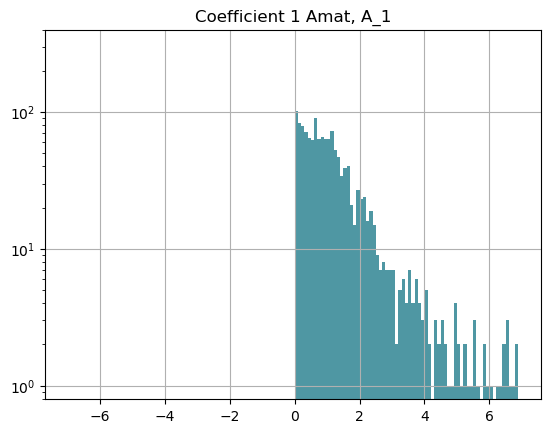

In [23]:
ax = df_Ban_Tot_nd['Coef1_Amat'].hist(bins=z1,color='#4F97A3').set_title("Coefficient 1 Amat, A_1")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7648583633189997, 400)

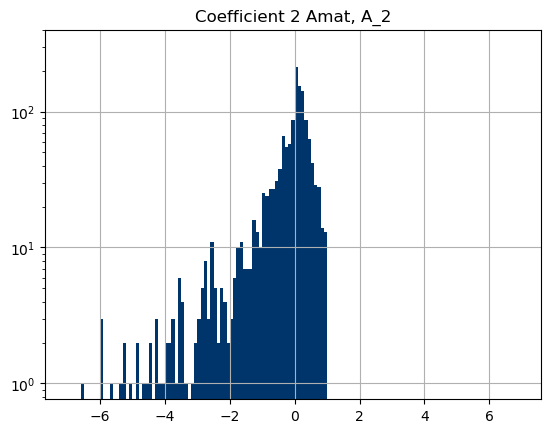

In [24]:
ax = df_Ban_Tot_nd['Coef2_Amat'].hist(bins=z1,color='#00356B').set_title("Coefficient 2 Amat, A_2")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7453608696500219, 400)

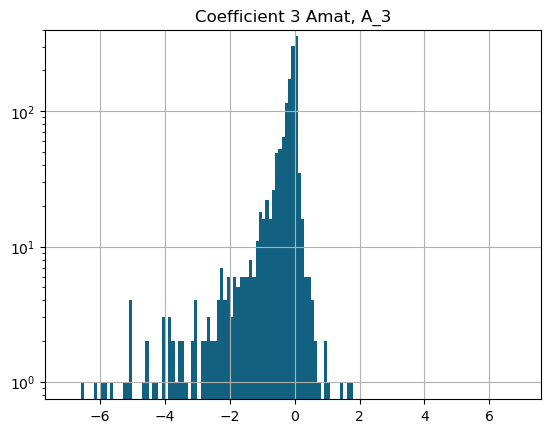

In [25]:
ax = df_Ban_Tot_nd['Coef3_Amat'].hist(bins=z1,color='#126180').set_title("Coefficient 3 Amat, A_3")
plt.yscale("log")
plt.ylim(0, 400)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7612708617255961, 400)

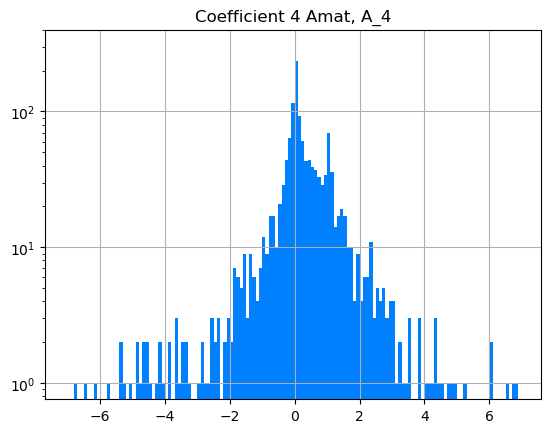

In [26]:
ax = df_Ban_Tot_nd['Coef4_Amat'].hist(bins=z1,color='#007FFF').set_title("Coefficient 4 Amat, A_4")
plt.yscale("log")
plt.ylim(0, 400)

### 2) Creación Sets justos Activas

Principalmente quitaremos los valores n.d. que estén en todas las databases, para hacer un Training justo. Lo hacemos en los databases de Bancarrota y de Activas.

In [27]:
df_Act_Spr_1=pd.read_csv('Springate_Activa.csv',encoding = 'unicode_escape',sep=';')
print(df_Act_Spr_1)

            ID Coef1_Springate Coef2_Springate Coef3_Springate  \
0            1         -0.1786          0.0810          0.2086   
1            2          0.3473          0.0039          0.1439   
2            3          0.4718          0.0385          0.0752   
3            4          0.1373          0.0490          0.0493   
4            5          0.0656          0.0826          0.5767   
...        ...             ...             ...             ...   
756606  756607          0.1994         -0.3508         -0.3611   
756607  756608          0.0635         -0.2936         -0.8655   
756608  756609          0.9479         -0.0628         -0.0796   
756609  756610            n.d.         -0.0300         -1.4282   
756610  756611          0.0177         -0.2568         -1.7528   

       Coef4_Springate  Resultado  
0               2.3157          2  
1               1.8919          2  
2               2.1073          2  
3              11.8888          2  
4               0.6623     

In [28]:
df_Act_Gro_1=pd.read_csv('Grover_Activa.csv',encoding = 'unicode_escape',sep=';')
print(df_Act_Gro_1)

            ID Coef1_Grover Coef2_Grover Coef3_Grover  Resultado
0            1      -0.1786       0.0810       0.0598          2
1            2       0.3473       0.0039       0.0774          2
2            3       0.4718       0.0385       0.0199          2
3            4       0.1373       0.0490       0.0366          2
4            5       0.0656       0.0826       0.0806          2
...        ...          ...          ...          ...        ...
756606  756607       0.1994      -0.3508      -0.2631          2
756607  756608       0.0635      -0.2936      -0.2936          2
756608  756609       0.9479      -0.0628      -0.0641          2
756609  756610         n.d.      -0.0300      -0.0300          2
756610  756611       0.0177      -0.2568      -0.2183          2

[756611 rows x 5 columns]


In [29]:
df_Act_Ama_1=pd.read_csv('Amat_Activa.csv',encoding = 'unicode_escape',sep=';')
print(df_Act_Ama_1)

            ID Coef1_Amat Coef2_Amat Coef3_Amat Coef4_Amat  Resultado
0            1     0.9028     0.6267     0.0598     0.0954          2
1            2     1.0684     0.2626     0.0774     0.2946          2
2            3     1.4550     0.4008     0.0199     0.0498          2
3            4     1.0009     0.0042     0.0366     8.7045          2
4            5     2.1201     0.8463     0.0806     0.0953          2
...        ...        ...        ...        ...        ...        ...
756606  756607     0.9389     0.0284    -0.2631    -9.2796          2
756607  756608     2.9480    -0.2812    -0.2936     1.0440          2
756608  756609     1.2426    -0.0048    -0.0641    13.3080          2
756609  756610    21.1787     0.9790    -0.0300    -0.0307          2
756610  756611     4.9112     0.0138    -0.2183   -15.8608          2

[756611 rows x 6 columns]


C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Creamos un set en Python para cada modelo (Springate, Grover, Amat) que contenga los IDs de las filas en las que haya algun n.d. Luego, uniremos los 3 sets entre ellos para tener un mega set de indices a borrar en los tres datasets.

In [30]:
df_nd_Act_Cf1_Spr=df_Act_Spr_1.index[df_Act_Spr_1['Coef1_Springate'] == "n.d."].tolist()
print(df_nd_Act_Cf1_Spr)
len(df_nd_Act_Cf1_Spr)

[8, 108, 172, 297, 405, 445, 612, 627, 821, 910, 931, 940, 973, 994, 1055, 1084, 1108, 1125, 1235, 1307, 1434, 1465, 1783, 1842, 2342, 2457, 2704, 2781, 2958, 3172, 3569, 3994, 4132, 4657, 4682, 4875, 4930, 5027, 5062, 5149, 5238, 5488, 6940, 6968, 7304, 7357, 7418, 7428, 7457, 7763, 8016, 8302, 8655, 9592, 9876, 10352, 10548, 11186, 11341, 11403, 12339, 12544, 13151, 13510, 13553, 13901, 14112, 14205, 14206, 14212, 14259, 14262, 14636, 14671, 14694, 15051, 15167, 15330, 16829, 17041, 17261, 17263, 17633, 17920, 18009, 18183, 18274, 18402, 18619, 19139, 19680, 21709, 21718, 22054, 22573, 22782, 22804, 23122, 23591, 23919, 24397, 24471, 24607, 24703, 25256, 25292, 25786, 25974, 26380, 26425, 27333, 27334, 27453, 27647, 27952, 28289, 28560, 28754, 29517, 30634, 31267, 31986, 32169, 32652, 32940, 33247, 33663, 35088, 35407, 35780, 36964, 37796, 38145, 38581, 38624, 39089, 39213, 39942, 39964, 39976, 40623, 40706, 40844, 41252, 41913, 42127, 42336, 42476, 42797, 43975, 44285, 44873, 44932,

20486

In [31]:
df_nd_Act_Cf2_Spr=df_Act_Spr_1.index[df_Act_Spr_1['Coef2_Springate'] == "n.d."].tolist()
print(df_nd_Act_Cf2_Spr)
len(df_nd_Act_Cf2_Spr)

[8, 108, 172, 405, 445, 627, 821, 973, 1055, 1084, 1108, 1465, 1611, 1783, 1842, 2253, 2342, 2457, 2704, 2781, 2958, 3082, 3172, 5149, 6968, 7304, 7418, 7428, 8302, 9876, 10548, 11341, 11403, 11777, 12339, 13151, 13510, 14212, 14262, 14487, 14671, 14817, 15167, 15245, 16415, 16583, 17707, 18274, 18619, 19410, 19704, 20131, 21791, 23309, 23651, 23944, 24749, 26182, 26380, 29700, 29723, 32169, 32951, 33663, 35407, 35556, 35660, 35780, 37705, 38581, 39024, 40844, 41252, 41913, 46818, 46857, 48748, 48811, 49076, 49592, 50049, 51456, 53869, 54343, 56957, 57209, 64025, 66866, 67505, 68388, 69894, 76784, 77802, 79811, 80494, 81240, 82284, 89251, 90007, 90871, 92733, 97011, 98575, 102705, 103126, 105905, 116536, 121332, 124010, 126966, 129120, 130003, 132513, 132906, 133152, 136391, 144822, 148037, 153903, 155820, 157475, 159464, 160344, 166614, 169434, 177595, 179400, 183062, 187854, 190171, 194130, 194138, 195122, 198194, 201815, 202036, 204844, 204916, 208148, 214551, 218062, 225499, 226087

3814

In [32]:
df_nd_Act_Cf3_Spr=df_Act_Spr_1.index[df_Act_Spr_1['Coef3_Springate'] == "n.d."].tolist()
print(df_nd_Act_Cf3_Spr)
len(df_nd_Act_Cf3_Spr)

[8, 108, 172, 405, 445, 627, 821, 973, 1043, 1055, 1084, 1108, 1315, 1349, 1465, 1611, 1783, 1818, 1842, 2062, 2192, 2253, 2342, 2387, 2457, 2704, 2781, 2958, 3082, 3161, 3172, 3475, 4269, 4587, 4791, 5102, 5112, 5149, 5319, 6018, 6968, 7304, 7418, 7428, 8302, 8846, 9015, 9138, 9876, 10548, 10691, 10995, 11341, 11403, 11574, 11777, 12339, 12359, 13151, 13510, 13845, 14212, 14262, 14487, 14671, 14789, 14817, 14906, 15005, 15167, 15245, 15502, 15577, 16415, 16583, 16798, 17460, 17633, 17707, 18274, 18619, 19410, 19527, 19704, 20131, 20417, 20698, 21410, 22028, 22589, 22606, 22691, 23309, 23651, 23944, 24749, 24809, 24835, 26182, 26380, 27367, 27453, 27816, 28289, 29450, 29723, 29988, 30230, 30293, 30845, 32169, 32873, 32951, 33663, 34276, 34414, 34839, 35407, 35479, 35497, 35660, 35780, 37476, 37625, 37705, 38581, 38963, 39258, 39675, 40750, 40844, 41252, 41913, 42446, 42964, 43889, 46818, 46840, 46857, 48748, 48811, 49076, 49589, 49592, 50049, 51376, 51456, 52795, 53826, 53869, 54057, 5

12099

In [33]:
df_nd_Act_Cf4_Spr=df_Act_Spr_1.index[df_Act_Spr_1['Coef4_Springate'] == "n.d."].tolist()
print(df_nd_Act_Cf4_Spr)
len(df_nd_Act_Cf4_Spr)

[8, 108, 172, 392, 405, 445, 473, 627, 671, 821, 973, 1002, 1055, 1084, 1108, 1398, 1465, 1783, 1842, 2128, 2342, 2457, 2631, 2704, 2781, 2958, 3172, 3392, 3422, 4585, 4657, 4761, 5149, 5826, 5912, 6059, 6393, 6847, 6968, 7058, 7257, 7304, 7418, 7428, 7508, 7572, 7705, 7718, 7773, 8302, 8759, 8951, 9216, 9626, 9730, 9835, 9876, 10277, 10478, 10548, 10702, 10907, 11252, 11303, 11341, 11354, 11403, 11874, 12136, 12339, 13151, 13510, 13595, 14017, 14045, 14212, 14234, 14262, 14474, 14581, 14671, 14833, 15167, 15303, 15810, 16660, 17054, 17837, 18274, 18403, 18619, 19151, 19310, 19500, 19820, 20311, 20430, 20555, 20904, 21059, 21900, 22345, 22469, 22543, 22704, 23043, 23237, 23416, 23719, 25596, 26182, 26380, 26425, 26645, 26782, 26949, 27252, 27300, 27453, 27495, 27623, 27799, 28706, 28860, 29067, 29517, 29779, 30137, 30172, 30962, 31321, 31829, 32169, 32308, 32734, 32793, 32964, 33169, 33297, 33305, 33344, 33625, 33663, 34412, 34995, 35034, 35407, 35780, 35846, 36586, 37311, 38145, 38462

61831

In [34]:
nd_Act_Spr=set(df_nd_Act_Cf1_Spr+df_nd_Act_Cf2_Spr+df_nd_Act_Cf3_Spr+df_nd_Act_Cf4_Spr)
print(nd_Act_Spr)

{524293, 8, 524299, 524306, 262164, 524327, 524343, 524348, 524359, 524367, 262226, 524370, 524380, 524383, 524395, 108, 262260, 524410, 262287, 262295, 524455, 262312, 172, 524462, 262351, 262356, 524518, 524530, 524531, 524532, 524543, 262411, 524558, 524565, 524566, 524570, 524572, 524580, 524583, 297, 262450, 262480, 524624, 262486, 524643, 524644, 524649, 524655, 262521, 524676, 524677, 392, 405, 524697, 262561, 524706, 524717, 262578, 262581, 524732, 445, 524734, 524742, 524743, 524745, 524749, 262606, 524757, 524758, 473, 524778, 524783, 524794, 524795, 524814, 524826, 524829, 524850, 262707, 524855, 524860, 524869, 524897, 612, 627, 524918, 524927, 524947, 524952, 671, 524968, 524972, 524982, 262844, 524988, 525001, 525009, 525010, 525019, 525020, 525028, 262896, 525048, 525049, 525050, 525070, 262932, 525083, 525096, 262961, 821, 525116, 525119, 525149, 263008, 525171, 910, 525198, 525205, 931, 525219, 525223, 940, 525229, 525232, 525254, 973, 263121, 994, 525285, 263143, 1002

In [35]:
df_nd_Act_Cf1_Gro=df_Act_Gro_1.index[df_Act_Gro_1['Coef1_Grover'] == "n.d."].tolist()
df_nd_Act_Cf2_Gro=df_Act_Gro_1.index[df_Act_Gro_1['Coef2_Grover'] == "n.d."].tolist()
df_nd_Act_Cf3_Gro=df_Act_Gro_1.index[df_Act_Gro_1['Coef3_Grover'] == "n.d."].tolist()
nd_Act_Gro=set(df_nd_Act_Cf1_Gro+df_nd_Act_Cf2_Gro+df_nd_Act_Cf3_Gro)
print(nd_Act_Gro)

{655364, 524293, 8, 655374, 655375, 655376, 655378, 655384, 655390, 655391, 655396, 655398, 524327, 655404, 655409, 524343, 524348, 655420, 655444, 655456, 393315, 655459, 655467, 108, 655473, 262260, 655477, 524410, 655483, 131201, 655491, 655497, 655501, 655506, 393363, 655509, 262295, 655515, 655526, 262312, 655531, 172, 655532, 524462, 655537, 655539, 393410, 655555, 655556, 655565, 655566, 262351, 393424, 262356, 655577, 655585, 524543, 393488, 393492, 281, 524570, 524580, 524583, 393512, 297, 262450, 655671, 131385, 655684, 655695, 524644, 524649, 393579, 524655, 655728, 655741, 524676, 524677, 655750, 405, 393630, 262561, 655781, 655783, 524717, 262578, 655794, 262581, 655800, 445, 524734, 393673, 524745, 262606, 524778, 655851, 524794, 655867, 524814, 393761, 655907, 524850, 524855, 655936, 524869, 655945, 393804, 655952, 655967, 612, 655981, 627, 393847, 131737, 393883, 393886, 131745, 656033, 131755, 524972, 656057, 262844, 656061, 656067, 525001, 656082, 525028, 131821, 6561

In [36]:
df_nd_Act_Cf1_Ama=df_Act_Ama_1.index[df_Act_Ama_1['Coef1_Amat'] == "n.d."].tolist()
print(len(df_nd_Act_Cf1_Ama))
df_nd_Act_Cf2_Ama=df_Act_Ama_1.index[df_Act_Ama_1['Coef2_Amat'] == "n.d."].tolist()
print(len(df_nd_Act_Cf2_Ama))
df_nd_Act_Cf3_Ama=df_Act_Ama_1.index[df_Act_Ama_1['Coef3_Amat'] == "n.d."].tolist()
print(len(df_nd_Act_Cf3_Ama))
df_nd_Act_Cf4_Ama=df_Act_Ama_1.index[df_Act_Ama_1['Coef4_Amat'] == "n.d."].tolist()
print(len(df_nd_Act_Cf4_Ama))
nd_Act_Ama=set(df_nd_Act_Cf1_Ama+df_nd_Act_Cf2_Ama+df_nd_Act_Cf3_Ama+df_nd_Act_Cf4_Ama)
print(nd_Act_Ama)

10080
56
4279
4288
{753666, 8, 720904, 720906, 458763, 622604, 753672, 720910, 753673, 753676, 753686, 426009, 753689, 557083, 753691, 753692, 753693, 753695, 688160, 163877, 753702, 327721, 720946, 753715, 753719, 720960, 753729, 753734, 753747, 655444, 622677, 753749, 557143, 720986, 524380, 589916, 753756, 753757, 589920, 720998, 229480, 753768, 32873, 108, 557165, 721004, 753774, 721005, 721013, 753782, 327800, 753784, 688252, 753788, 721022, 753790, 655488, 426114, 753794, 753799, 721032, 327819, 655499, 655501, 753806, 262287, 753810, 655509, 721046, 262295, 753817, 753818, 753819, 721052, 753825, 426150, 557222, 721063, 721066, 172, 622765, 721070, 753837, 721068, 393393, 295090, 622771, 753841, 753836, 655543, 32951, 721081, 753850, 753848, 753852, 590014, 688319, 753854, 753855, 721090, 655555, 590019, 753863, 753865, 753868, 655565, 753870, 262351, 753872, 753873, 262356, 753880, 753882, 753884, 753886, 753893, 622822, 753896, 622829, 753901, 655600, 721137, 753906, 524531, 7

In [37]:
nd_Act_Tot=sorted(nd_Act_Spr.union(nd_Act_Gro.union(nd_Act_Ama)))
print(nd_Act_Tot)
len(nd_Act_Tot)

[8, 108, 172, 281, 297, 392, 405, 445, 473, 612, 627, 671, 821, 910, 931, 940, 973, 994, 1002, 1043, 1055, 1084, 1108, 1125, 1235, 1307, 1315, 1349, 1360, 1398, 1434, 1465, 1611, 1783, 1818, 1842, 2062, 2128, 2192, 2253, 2342, 2387, 2457, 2480, 2631, 2704, 2781, 2958, 3082, 3161, 3172, 3392, 3422, 3475, 3569, 3797, 3994, 4132, 4269, 4585, 4587, 4657, 4682, 4761, 4791, 4875, 4930, 5027, 5062, 5102, 5112, 5149, 5238, 5319, 5488, 5826, 5912, 6018, 6059, 6393, 6847, 6940, 6968, 7058, 7257, 7304, 7357, 7359, 7418, 7428, 7429, 7457, 7508, 7572, 7705, 7718, 7763, 7773, 8016, 8302, 8655, 8759, 8846, 8951, 9015, 9138, 9216, 9592, 9626, 9730, 9835, 9876, 10277, 10352, 10478, 10548, 10691, 10702, 10907, 10995, 11186, 11252, 11303, 11341, 11354, 11403, 11574, 11777, 11874, 12136, 12339, 12359, 12544, 13151, 13510, 13553, 13578, 13595, 13845, 13901, 14017, 14045, 14112, 14205, 14206, 14212, 14234, 14259, 14262, 14329, 14474, 14487, 14581, 14636, 14671, 14694, 14789, 14817, 14833, 14906, 15005, 1505

80667

In [38]:
df_Act_Spr_2=df_Act_Spr_1.drop(nd_Act_Tot)
df_Act_Spr_2["Coef1_Springate"]=df_Act_Spr_2["Coef1_Springate"].astype(float)
df_Act_Spr_2["Coef2_Springate"]=df_Act_Spr_2["Coef2_Springate"].astype(float)
df_Act_Spr_2["Coef3_Springate"]=df_Act_Spr_2["Coef3_Springate"].astype(float)
df_Act_Spr_2["Coef4_Springate"]=df_Act_Spr_2["Coef4_Springate"].astype(float)
print(df_Act_Spr_2)

            ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0            1          -0.1786           0.0810           0.2086   
1            2           0.3473           0.0039           0.1439   
2            3           0.4718           0.0385           0.0752   
3            4           0.1373           0.0490           0.0493   
4            5           0.0656           0.0826           0.5767   
...        ...              ...              ...              ...   
732516  732517           0.1232          -0.1647          -5.9479   
732531  732532           0.1989          -2.1463          -0.7942   
732549  732550          -0.0927           0.0000           0.0208   
732569  732570           0.6813          -0.0064          -0.0240   
732589  732590           0.4244          -0.0416          -0.0402   

        Coef4_Springate  Resultado  
0                2.3157          2  
1                1.8919          2  
2                2.1073          2  
3               11.8888

In [39]:
df_Act_Gro_2=df_Act_Gro_1.drop(nd_Act_Tot)
df_Act_Gro_2["Coef1_Grover"]=df_Act_Gro_2["Coef1_Grover"].astype(float)
df_Act_Gro_2["Coef2_Grover"]=df_Act_Gro_2["Coef2_Grover"].astype(float)
df_Act_Gro_2["Coef3_Grover"]=df_Act_Gro_2["Coef3_Grover"].astype(float)
print(df_Act_Gro_2)

            ID  Coef1_Grover  Coef2_Grover  Coef3_Grover  Resultado
0            1       -0.1786        0.0810        0.0598          2
1            2        0.3473        0.0039        0.0774          2
2            3        0.4718        0.0385        0.0199          2
3            4        0.1373        0.0490        0.0366          2
4            5        0.0656        0.0826        0.0806          2
...        ...           ...           ...           ...        ...
732516  732517        0.1232       -0.1647       -0.1649          2
732531  732532        0.1989       -2.1463       -1.6097          2
732549  732550       -0.0927        0.0000        0.0117          2
732569  732570        0.6813       -0.0064        0.0025          2
732589  732590        0.4244       -0.0416       -0.0416          2

[675944 rows x 5 columns]


In [40]:
df_Act_Ama_2=df_Act_Ama_1.drop(nd_Act_Tot)
df_Act_Ama_2["Coef1_Amat"]=df_Act_Ama_2["Coef1_Amat"].astype(float)
df_Act_Ama_2["Coef2_Amat"]=df_Act_Ama_2["Coef2_Amat"].astype(float)
df_Act_Ama_2["Coef3_Amat"]=df_Act_Ama_2["Coef3_Amat"].astype(float)
df_Act_Ama_2["Coef4_Amat"]=df_Act_Ama_2["Coef4_Amat"].astype(float)
print(df_Act_Ama_2)

            ID  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  Resultado
0            1      0.9028      0.6267      0.0598      0.0954          2
1            2      1.0684      0.2626      0.0774      0.2946          2
2            3      1.4550      0.4008      0.0199      0.0498          2
3            4      1.0009      0.0042      0.0366      8.7045          2
4            5      2.1201      0.8463      0.0806      0.0953          2
...        ...         ...         ...         ...         ...        ...
732516  732517      9.4479      0.9574     -0.1649     -0.1722          2
732531  732532      0.1321     -1.7025     -1.6097      0.9455          2
732549  732550      1.0615      0.4367      0.0117      0.0269          2
732569  732570      3.6889      0.7320      0.0025      0.0034          2
732589  732590      0.9633     -0.0349     -0.0416      1.1897          2

[675944 rows x 6 columns]


In [41]:
df_Act_Tot_nd=pd.concat([df_Act_Spr_2,df_Act_Gro_2, df_Act_Ama_2], axis=1)
df_Act_Tot_nd.columns=['ID', 'Coef1_Springate', 'Coef2_Springate', 'Coef3_Springate', 'Coef4_Springate','Resultado_Springate','ID_Grover', 'Coef1_Grover', 'Coef2_Grover', 'Coef3_Grover','Resultado_Grover','ID_Amat', 'Coef1_Amat', 'Coef2_Amat', 'Coef3_Amat', 'Coef4_Amat','Resultado']
df_Act_Tot_nd=df_Act_Tot_nd.drop(df_Act_Tot_nd.columns[[5,6,10,11]], axis=1)
print(df_Act_Tot_nd)

            ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0            1          -0.1786           0.0810           0.2086   
1            2           0.3473           0.0039           0.1439   
2            3           0.4718           0.0385           0.0752   
3            4           0.1373           0.0490           0.0493   
4            5           0.0656           0.0826           0.5767   
...        ...              ...              ...              ...   
732516  732517           0.1232          -0.1647          -5.9479   
732531  732532           0.1989          -2.1463          -0.7942   
732549  732550          -0.0927           0.0000           0.0208   
732569  732570           0.6813          -0.0064          -0.0240   
732589  732590           0.4244          -0.0416          -0.0402   

        Coef4_Springate  Coef1_Grover  Coef2_Grover  Coef3_Grover  Coef1_Amat  \
0                2.3157       -0.1786        0.0810        0.0598      0.9028   
1        

In [42]:
df_Act_Tot_nd=df_Act_Tot_nd.drop(df_Act_Tot_nd.columns[[5, 6, 7]], axis=1)
print(df_Act_Tot_nd)

            ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0            1          -0.1786           0.0810           0.2086   
1            2           0.3473           0.0039           0.1439   
2            3           0.4718           0.0385           0.0752   
3            4           0.1373           0.0490           0.0493   
4            5           0.0656           0.0826           0.5767   
...        ...              ...              ...              ...   
732516  732517           0.1232          -0.1647          -5.9479   
732531  732532           0.1989          -2.1463          -0.7942   
732549  732550          -0.0927           0.0000           0.0208   
732569  732570           0.6813          -0.0064          -0.0240   
732589  732590           0.4244          -0.0416          -0.0402   

        Coef4_Springate  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  \
0                2.3157      0.9028      0.6267      0.0598      0.0954   
1                1.89

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(1.7273422151744633, 400000)

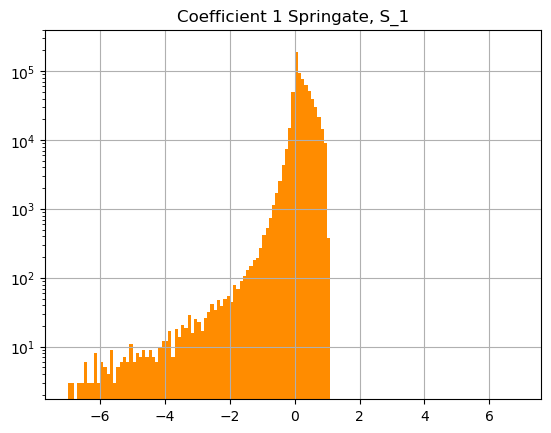

In [43]:
ax = df_Act_Tot_nd['Coef1_Springate'].hist(bins=z1,color='#FF8C00').set_title("Coefficient 1 Springate, S_1")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5305710956106403, 400000)

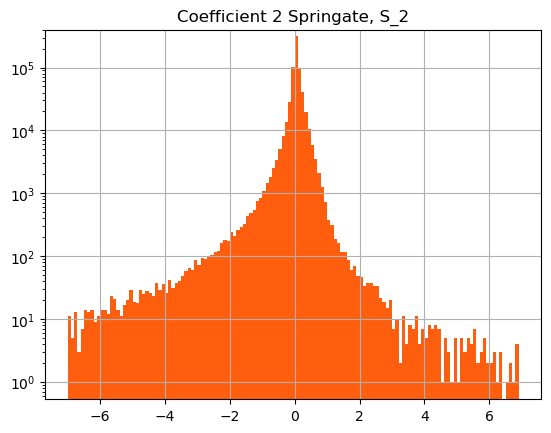

In [44]:
ax = df_Act_Tot_nd['Coef2_Springate'].hist(bins=z1,color='#FF5E0E').set_title("Coefficient 2 Springate, S_2")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(43.959783499227655, 400000)

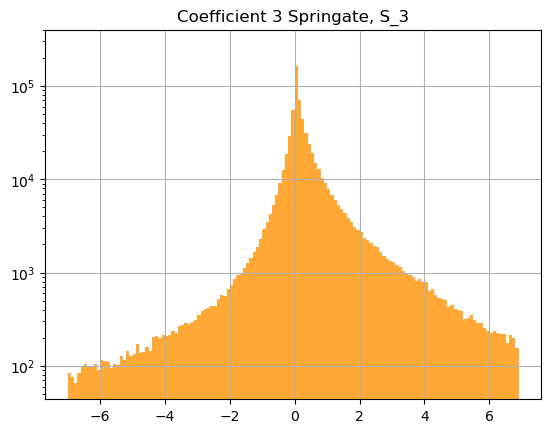

In [45]:
ax = df_Act_Tot_nd['Coef3_Springate'].hist(bins=z1,color='#FFA836').set_title("Coefficient 3 Springate, S_3")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(313.596346433361, 400000)

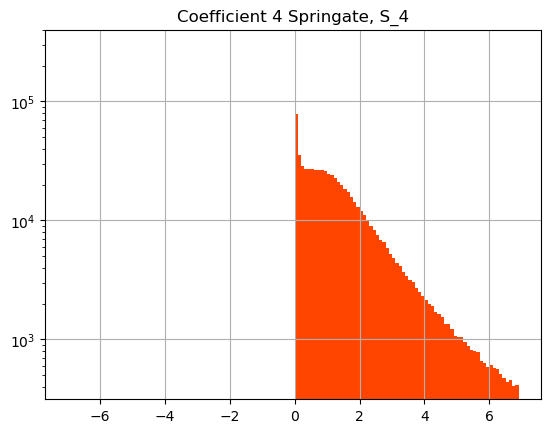

In [46]:
ax = df_Act_Tot_nd['Coef4_Springate'].hist(bins=z1,color='#FF4500').set_title("Coefficient 4 Springate, S_4")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(1080.5965331015157, 400000)

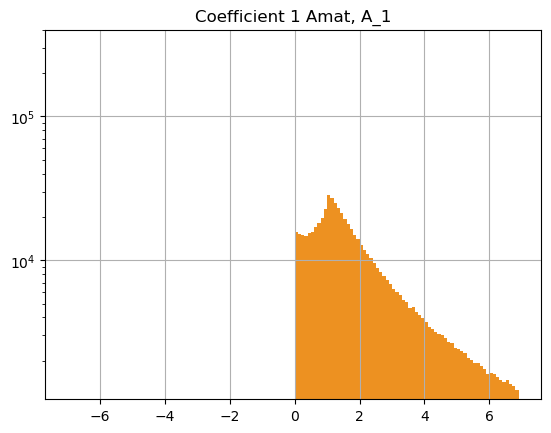

In [47]:
ax = df_Act_Tot_nd['Coef1_Amat'].hist(bins=z1,color='#ED9121').set_title("Coefficient 1 Amat, A_1")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(18.31301197727527, 400000)

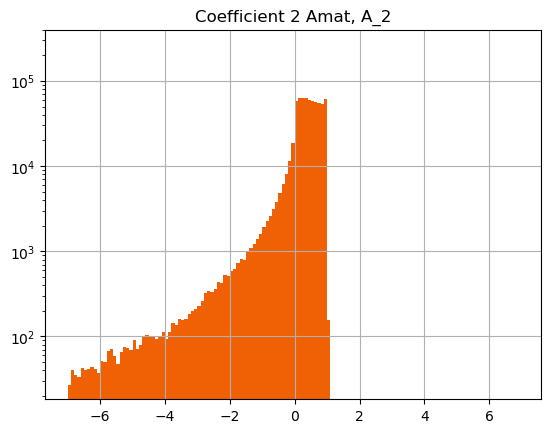

In [48]:
ax = df_Act_Tot_nd['Coef2_Amat'].hist(bins=z1,color='#F06105').set_title("Coefficient 2 Amat, A_2")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5280902897178389, 400000)

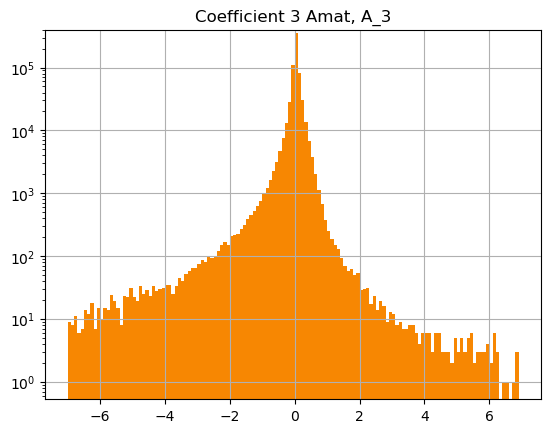

In [49]:
ax = df_Act_Tot_nd['Coef3_Amat'].hist(bins=z1,color='#F78702').set_title("Coefficient 3 Amat, A_3")
plt.yscale("log")
plt.ylim(0, 400000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(34.27537581510055, 400000)

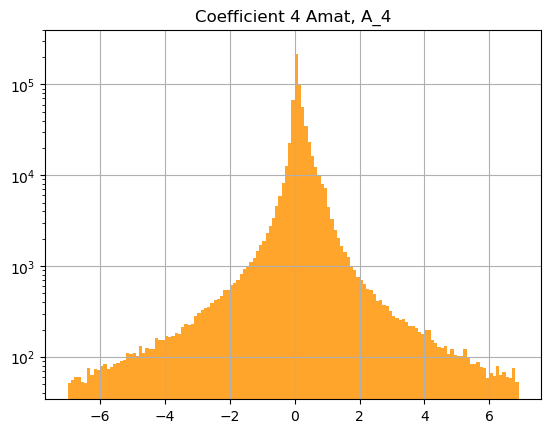

In [50]:
ax = df_Act_Tot_nd['Coef4_Amat'].hist(bins=z1,color='#FFA52C').set_title("Coefficient 4 Amat, A_4")
plt.yscale("log")
plt.ylim(0, 400000)

### 3) Estudio anómalos Bancarrota

In [51]:
Ban_Spr_2_Cf1_median=df_Ban_Tot_nd['Coef1_Springate'].median()
Ban_Spr_2_Cf1_Q1=df_Ban_Tot_nd['Coef1_Springate'].quantile(0.25)
Ban_Spr_2_Cf1_Q3=df_Ban_Tot_nd['Coef1_Springate'].quantile(0.75)
Ban_Spr_2_Cf1_IQR=Ban_Spr_2_Cf1_Q3-Ban_Spr_2_Cf1_Q1
Ban_Spr_2_Cf1_UL=Ban_Spr_2_Cf1_Q3+1.5*Ban_Spr_2_Cf1_IQR
Ban_Spr_2_Cf1_LL=Ban_Spr_2_Cf1_Q1-1.5*Ban_Spr_2_Cf1_IQR
Ban_Spr_2_Cf1_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef1_Springate'] <= Ban_Spr_2_Cf1_LL].tolist()
Ban_Spr_2_Cf1_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef1_Springate'] >= Ban_Spr_2_Cf1_UL].tolist()
print(Ban_Spr_2_Cf1_Q1)
print(Ban_Spr_2_Cf1_median)
print(Ban_Spr_2_Cf1_Q3)
print(Ban_Spr_2_Cf1_UL)
print(Ban_Spr_2_Cf1_LL)
print(len(set(Ban_Spr_2_Cf1_index_lb+Ban_Spr_2_Cf1_index_ub)))

0.0259
0.2039
0.48
1.1611500000000001
-0.65525
40


In [52]:
Ban_Spr_2_Cf2_median=df_Ban_Tot_nd['Coef2_Springate'].median()
Ban_Spr_2_Cf2_Q1=df_Ban_Tot_nd['Coef2_Springate'].quantile(0.25)
Ban_Spr_2_Cf2_Q3=df_Ban_Tot_nd['Coef2_Springate'].quantile(0.75)
Ban_Spr_2_Cf2_IQR=Ban_Spr_2_Cf2_Q3-Ban_Spr_2_Cf2_Q1
Ban_Spr_2_Cf2_UL=Ban_Spr_2_Cf2_Q3+1.5*Ban_Spr_2_Cf2_IQR
Ban_Spr_2_Cf2_LL=Ban_Spr_2_Cf2_Q1-1.5*Ban_Spr_2_Cf2_IQR
Ban_Spr_2_Cf2_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef2_Springate'] <= Ban_Spr_2_Cf2_LL].tolist()
Ban_Spr_2_Cf2_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef2_Springate'] >= Ban_Spr_2_Cf2_UL].tolist()
print(Ban_Spr_2_Cf2_Q1)
print(Ban_Spr_2_Cf2_median)
print(Ban_Spr_2_Cf2_Q3)
print(Ban_Spr_2_Cf2_UL)
print(Ban_Spr_2_Cf2_LL)
print(len(set(Ban_Spr_2_Cf2_index_lb+Ban_Spr_2_Cf2_index_ub)))

-0.3906
-0.0834
0.0214
0.6394
-1.0086
182


In [53]:
Ban_Spr_2_Cf3_median=df_Ban_Tot_nd['Coef3_Springate'].median()
Ban_Spr_2_Cf3_Q1=df_Ban_Tot_nd['Coef3_Springate'].quantile(0.25)
Ban_Spr_2_Cf3_Q3=df_Ban_Tot_nd['Coef3_Springate'].quantile(0.75)
Ban_Spr_2_Cf3_IQR=Ban_Spr_2_Cf3_Q3-Ban_Spr_2_Cf3_Q1
Ban_Spr_2_Cf3_UL=Ban_Spr_2_Cf3_Q3+1.5*Ban_Spr_2_Cf3_IQR
Ban_Spr_2_Cf3_LL=Ban_Spr_2_Cf3_Q1-1.5*Ban_Spr_2_Cf3_IQR
Ban_Spr_2_Cf3_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef3_Springate'] <= Ban_Spr_2_Cf3_LL].tolist()
Ban_Spr_2_Cf3_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef3_Springate'] >= Ban_Spr_2_Cf3_UL].tolist()
print(Ban_Spr_2_Cf3_Q1)
print(Ban_Spr_2_Cf3_median)
print(Ban_Spr_2_Cf3_Q3)
print(Ban_Spr_2_Cf3_UL)
print(Ban_Spr_2_Cf3_LL)
print(len(set(Ban_Spr_2_Cf3_index_lb+Ban_Spr_2_Cf3_index_ub)))

-0.6693
-0.1967
0.0139
1.0387
-1.6941
145


In [54]:
Ban_Spr_2_Cf4_median=df_Ban_Tot_nd['Coef4_Springate'].median()
Ban_Spr_2_Cf4_Q1=df_Ban_Tot_nd['Coef4_Springate'].quantile(0.25)
Ban_Spr_2_Cf4_Q3=df_Ban_Tot_nd['Coef4_Springate'].quantile(0.75)
Ban_Spr_2_Cf4_IQR=Ban_Spr_2_Cf4_Q3-Ban_Spr_2_Cf4_Q1
Ban_Spr_2_Cf4_UL=Ban_Spr_2_Cf4_Q3+1.5*Ban_Spr_2_Cf4_IQR
Ban_Spr_2_Cf4_LL=Ban_Spr_2_Cf4_Q1-1.5*Ban_Spr_2_Cf4_IQR
Ban_Spr_2_Cf4_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef4_Springate'] <= Ban_Spr_2_Cf4_LL].tolist()
Ban_Spr_2_Cf4_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef4_Springate'] >= Ban_Spr_2_Cf4_UL].tolist()
print(Ban_Spr_2_Cf4_Q1)
print(Ban_Spr_2_Cf4_median)
print(Ban_Spr_2_Cf4_Q3)
print(Ban_Spr_2_Cf4_UL)
print(Ban_Spr_2_Cf4_LL)
print(len(set(Ban_Spr_2_Cf4_index_lb+Ban_Spr_2_Cf4_index_ub)))

0.4599
1.0736
2.1424
4.66615
-2.0638499999999995
114


In [55]:
Ban_Ama_2_Cf1_median=df_Ban_Tot_nd['Coef1_Amat'].median()
Ban_Ama_2_Cf1_Q1=df_Ban_Tot_nd['Coef1_Amat'].quantile(0.25)
Ban_Ama_2_Cf1_Q3=df_Ban_Tot_nd['Coef1_Amat'].quantile(0.75)
Ban_Ama_2_Cf1_IQR=Ban_Ama_2_Cf1_Q3-Ban_Ama_2_Cf1_Q1
Ban_Ama_2_Cf1_UL=Ban_Ama_2_Cf1_Q3+1.5*Ban_Ama_2_Cf1_IQR
Ban_Ama_2_Cf1_LL=Ban_Ama_2_Cf1_Q1-1.5*Ban_Ama_2_Cf1_IQR
Ban_Ama_2_Cf1_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef1_Amat'] <= Ban_Ama_2_Cf1_LL].tolist()
Ban_Ama_2_Cf1_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef1_Amat'] >= Ban_Ama_2_Cf1_UL].tolist()
print(Ban_Ama_2_Cf1_Q1)
print(Ban_Ama_2_Cf1_median)
print(Ban_Ama_2_Cf1_Q3)
print(Ban_Ama_2_Cf1_UL)
print(Ban_Ama_2_Cf1_LL)
print(len(set(Ban_Ama_2_Cf1_index_lb+Ban_Ama_2_Cf1_index_ub)))

0.4389
0.9727
1.6838
3.55115
-1.4284499999999998
128


In [56]:
Ban_Ama_2_Cf2_median=df_Ban_Tot_nd['Coef2_Amat'].median()
Ban_Ama_2_Cf2_Q1=df_Ban_Tot_nd['Coef2_Amat'].quantile(0.25)
Ban_Ama_2_Cf2_Q3=df_Ban_Tot_nd['Coef2_Amat'].quantile(0.75)
Ban_Ama_2_Cf2_IQR=Ban_Ama_2_Cf2_Q3-Ban_Ama_2_Cf2_Q1
Ban_Ama_2_Cf2_UL=Ban_Ama_2_Cf2_Q3+1.5*Ban_Ama_2_Cf2_IQR
Ban_Ama_2_Cf2_LL=Ban_Ama_2_Cf2_Q1-1.5*Ban_Ama_2_Cf2_IQR
Ban_Ama_2_Cf2_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef2_Amat'] <= Ban_Ama_2_Cf2_LL].tolist()
Ban_Ama_2_Cf2_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef2_Amat'] >= Ban_Ama_2_Cf2_UL].tolist()
print(Ban_Ama_2_Cf2_Q1)
print(Ban_Ama_2_Cf2_median)
print(Ban_Ama_2_Cf2_Q3)
print(Ban_Ama_2_Cf2_UL)
print(Ban_Ama_2_Cf2_LL)
print(len(set(Ban_Ama_2_Cf2_index_lb+Ban_Ama_2_Cf2_index_ub)))

-0.4752
0.031
0.2334
1.2963
-1.5381
171


In [57]:
Ban_Ama_2_Cf3_median=df_Ban_Tot_nd['Coef3_Amat'].median()
Ban_Ama_2_Cf3_Q1=df_Ban_Tot_nd['Coef3_Amat'].quantile(0.25)
Ban_Ama_2_Cf3_Q3=df_Ban_Tot_nd['Coef3_Amat'].quantile(0.75)
Ban_Ama_2_Cf3_IQR=Ban_Ama_2_Cf3_Q3-Ban_Ama_2_Cf3_Q1
Ban_Ama_2_Cf3_UL=Ban_Ama_2_Cf3_Q3+1.5*Ban_Ama_2_Cf3_IQR
Ban_Ama_2_Cf3_LL=Ban_Ama_2_Cf3_Q1-1.5*Ban_Ama_2_Cf3_IQR
Ban_Ama_2_Cf3_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef3_Amat'] <= Ban_Ama_2_Cf3_LL].tolist()
Ban_Ama_2_Cf3_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef3_Amat'] >= Ban_Ama_2_Cf3_UL].tolist()
print(Ban_Ama_2_Cf3_Q1)
print(Ban_Ama_2_Cf3_median)
print(Ban_Ama_2_Cf3_Q3)
print(Ban_Ama_2_Cf3_UL)
print(Ban_Ama_2_Cf3_LL)
print(len(set(Ban_Ama_2_Cf3_index_lb+Ban_Ama_2_Cf3_index_ub)))

-0.3968
-0.0927
0.0046
0.6067
-0.9988999999999999
186


In [58]:
Ban_Ama_2_Cf4_median=df_Ban_Tot_nd['Coef4_Amat'].median()
Ban_Ama_2_Cf4_Q1=df_Ban_Tot_nd['Coef4_Amat'].quantile(0.25)
Ban_Ama_2_Cf4_Q3=df_Ban_Tot_nd['Coef4_Amat'].quantile(0.75)
Ban_Ama_2_Cf4_IQR=Ban_Ama_2_Cf4_Q3-Ban_Ama_2_Cf4_Q1
Ban_Ama_2_Cf4_UL=Ban_Ama_2_Cf4_Q3+1.5*Ban_Ama_2_Cf4_IQR
Ban_Ama_2_Cf4_LL=Ban_Ama_2_Cf4_Q1-1.5*Ban_Ama_2_Cf4_IQR
Ban_Ama_2_Cf4_index_lb=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef4_Amat'] <= Ban_Ama_2_Cf4_LL].tolist()
Ban_Ama_2_Cf4_index_ub=df_Ban_Tot_nd.index[df_Ban_Tot_nd['Coef4_Amat'] >= Ban_Ama_2_Cf4_UL].tolist()
print(Ban_Ama_2_Cf4_Q1)
print(Ban_Ama_2_Cf4_median)
print(Ban_Ama_2_Cf4_Q3)
print(Ban_Ama_2_Cf4_UL)
print(Ban_Ama_2_Cf4_LL)
print(len(set(Ban_Ama_2_Cf4_index_lb+Ban_Ama_2_Cf4_index_ub)))

-0.103
0.1093
0.8652
2.3175
-1.5553
205


In [59]:
outliers_Ban=set(Ban_Ama_2_Cf1_index_lb+Ban_Ama_2_Cf1_index_ub+Ban_Ama_2_Cf2_index_lb+Ban_Ama_2_Cf2_index_ub+Ban_Ama_2_Cf3_index_lb+Ban_Ama_2_Cf3_index_ub+Ban_Ama_2_Cf4_index_lb+Ban_Ama_2_Cf4_index_ub+Ban_Spr_2_Cf1_index_lb+Ban_Spr_2_Cf1_index_ub+Ban_Spr_2_Cf2_index_lb+Ban_Spr_2_Cf2_index_ub+Ban_Spr_2_Cf3_index_lb+Ban_Spr_2_Cf3_index_ub+Ban_Spr_2_Cf4_index_lb+Ban_Spr_2_Cf4_index_ub)
print(outliers_Ban)
print(len(outliers_Ban))

{0, 2, 12, 13, 15, 19, 26, 28, 31, 38, 42, 44, 47, 49, 53, 57, 58, 73, 74, 78, 83, 87, 98, 107, 109, 112, 116, 118, 119, 121, 127, 130, 131, 133, 135, 138, 143, 144, 151, 152, 155, 158, 161, 162, 163, 164, 170, 178, 179, 180, 181, 182, 186, 188, 190, 193, 194, 197, 199, 201, 205, 207, 214, 215, 216, 219, 220, 225, 233, 240, 243, 245, 248, 249, 250, 253, 266, 270, 273, 278, 281, 285, 289, 291, 293, 296, 298, 300, 301, 303, 309, 312, 316, 325, 328, 330, 332, 335, 336, 338, 339, 342, 347, 351, 352, 354, 359, 361, 362, 365, 366, 368, 369, 373, 375, 376, 378, 379, 380, 384, 395, 398, 400, 403, 404, 405, 407, 408, 414, 416, 427, 428, 429, 430, 431, 434, 435, 436, 438, 440, 441, 443, 444, 447, 448, 449, 451, 453, 454, 456, 459, 467, 471, 472, 473, 486, 487, 496, 500, 504, 505, 506, 507, 510, 512, 518, 521, 525, 526, 527, 529, 531, 534, 536, 538, 541, 546, 547, 549, 555, 557, 558, 564, 566, 568, 570, 575, 581, 582, 583, 584, 587, 590, 591, 593, 597, 604, 605, 608, 610, 613, 614, 616, 621, 622,

In [60]:
df_Ban_Tot_nd_nooutliers=df_Ban_Tot_nd.drop(outliers_Ban)
print(df_Ban_Tot_nd_nooutliers)

        ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
1        2           0.6894           0.1641           0.3116   
3        4          -0.0034           0.0296          -0.2114   
4        5           0.2916           0.0341           0.0534   
5        6           0.3450          -0.1234          -0.1481   
6        7           0.0593          -0.3758          -0.7022   
...    ...              ...              ...              ...   
1492  1493          -0.3422          -0.1538          -0.2613   
1495  1496           0.0247          -0.1097          -0.0973   
1496  1497          -0.0206          -0.0668          -0.0340   
1498  1499           0.0964          -0.2809          -0.3393   
1501  1502          -0.0555          -0.3837          -0.3051   

      Coef4_Springate  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  \
1              2.8739      1.7204      0.4234      0.1196      0.2824   
3              0.6265      0.4756      0.2109     -0.1652     -0.7833   


C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(2.463776346241737, 350)

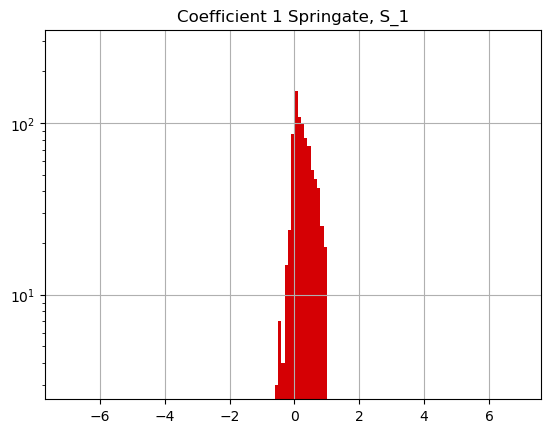

In [61]:
ax = df_Ban_Tot_nd_nooutliers['Coef1_Springate'].hist(bins=z1,color='#D50004').set_title("Coefficient 1 Springate, S_1")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(2.3775564386414483, 350)

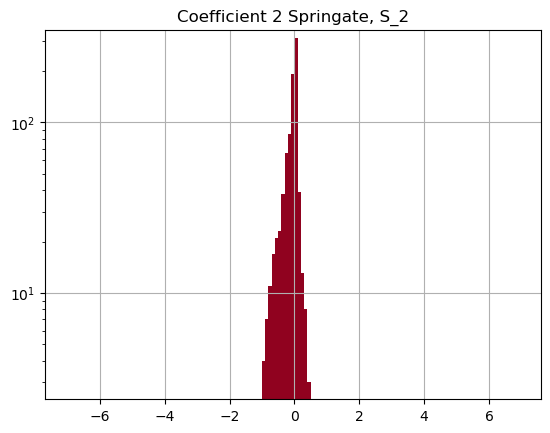

In [62]:
ax = df_Ban_Tot_nd_nooutliers['Coef2_Springate'].hist(bins=z1,color='#90021F').set_title("Coefficient 2 Springate, S_2")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7634496253574105, 350)

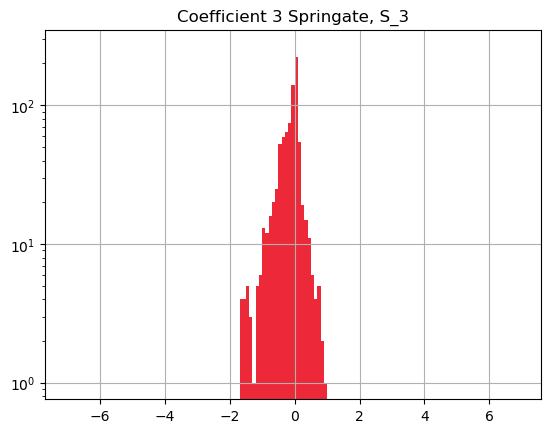

In [63]:
ax = df_Ban_Tot_nd_nooutliers['Coef3_Springate'].hist(bins=z1,color='#ED2939').set_title("Coefficient 3 Springate, S_3")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.8027415617602307, 350)

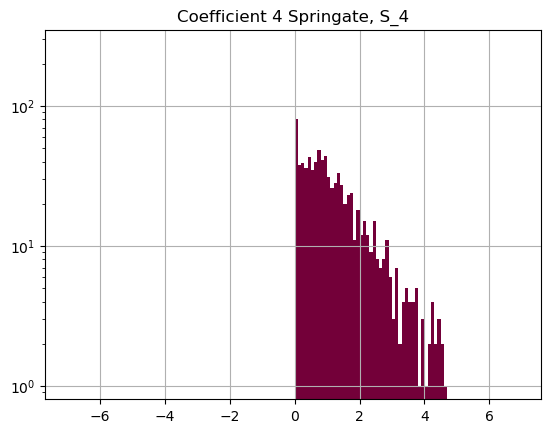

In [64]:
ax = df_Ban_Tot_nd_nooutliers['Coef4_Springate'].hist(bins=z1,color='#730039').set_title("Coefficient 4 Springate, S_4")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.8155627834605284, 350)

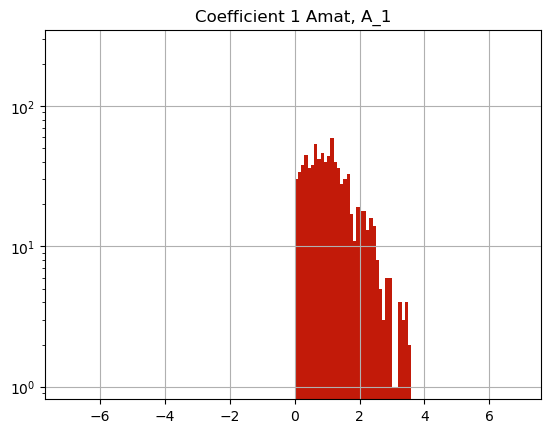

In [65]:
ax = df_Ban_Tot_nd_nooutliers['Coef1_Amat'].hist(bins=z1,color='#C21A09').set_title("Coefficient 1 Amat, A_1")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7871199821209824, 350)

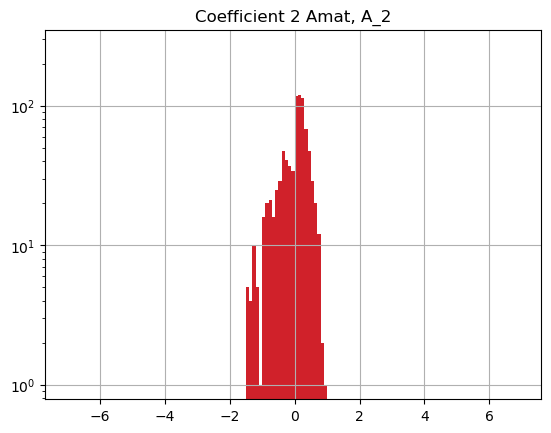

In [66]:
ax = df_Ban_Tot_nd_nooutliers['Coef2_Amat'].hist(bins=z1,color='#D0212A').set_title("Coefficient 2 Amat, A_2")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7525041497043836, 350)

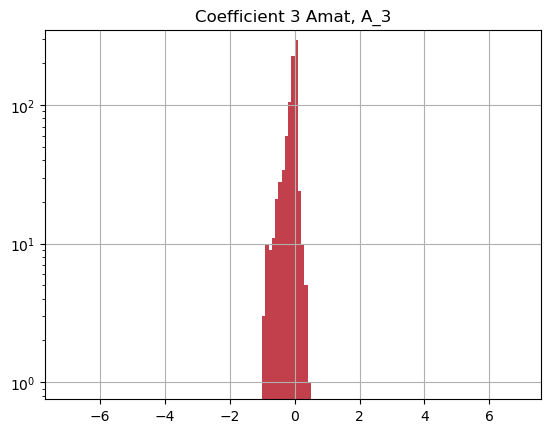

In [67]:
ax = df_Ban_Tot_nd_nooutliers['Coef3_Amat'].hist(bins=z1,color='#C2404B').set_title("Coefficient 3 Amat, A_3")
plt.yscale("log")
plt.ylim(0, 350)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.7711095313020907, 350)

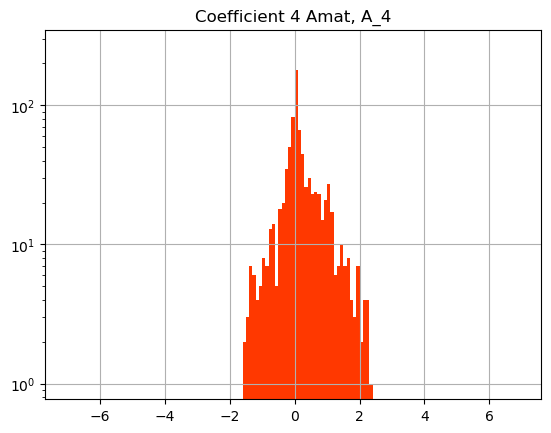

In [68]:
ax = df_Ban_Tot_nd_nooutliers['Coef4_Amat'].hist(bins=z1,color='#FF3800').set_title("Coefficient 4 Amat, A_4")
plt.yscale("log")
plt.ylim(0, 350)

### 4) Estudio anómalos Activas

In [69]:
Act_Spr_2_Cf1_median=df_Act_Tot_nd['Coef1_Springate'].median()
Act_Spr_2_Cf1_Q1=df_Act_Tot_nd['Coef1_Springate'].quantile(0.25)
Act_Spr_2_Cf1_Q3=df_Act_Tot_nd['Coef1_Springate'].quantile(0.75)
Act_Spr_2_Cf1_IQR=Act_Spr_2_Cf1_Q3-Act_Spr_2_Cf1_Q1
Act_Spr_2_Cf1_UL=Act_Spr_2_Cf1_Q3+1.5*Act_Spr_2_Cf1_IQR
Act_Spr_2_Cf1_LL=Act_Spr_2_Cf1_Q1-1.5*Act_Spr_2_Cf1_IQR
Act_Spr_2_Cf1_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef1_Springate'] <= Act_Spr_2_Cf1_LL].tolist()
Act_Spr_2_Cf1_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef1_Springate'] >= Act_Spr_2_Cf1_UL].tolist()
print(Act_Spr_2_Cf1_Q1)
print(Act_Spr_2_Cf1_median)
print(Act_Spr_2_Cf1_Q3)
print(Act_Spr_2_Cf1_UL)
print(Act_Spr_2_Cf1_LL)
print(len(set(Act_Spr_2_Cf1_index_lb+Act_Spr_2_Cf1_index_ub)))

0.0253
0.1662
0.3968
0.9540500000000001
-0.53195
10134


In [70]:
Act_Spr_2_Cf2_median=df_Act_Tot_nd['Coef2_Springate'].median()
Act_Spr_2_Cf2_Q1=df_Act_Tot_nd['Coef2_Springate'].quantile(0.25)
Act_Spr_2_Cf2_Q3=df_Act_Tot_nd['Coef2_Springate'].quantile(0.75)
Act_Spr_2_Cf2_IQR=Act_Spr_2_Cf2_Q3-Act_Spr_2_Cf2_Q1
Act_Spr_2_Cf2_UL=Act_Spr_2_Cf2_Q3+1.5*Act_Spr_2_Cf2_IQR
Act_Spr_2_Cf2_LL=Act_Spr_2_Cf2_Q1-1.5*Act_Spr_2_Cf2_IQR
Act_Spr_2_Cf2_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef2_Springate'] <= Act_Spr_2_Cf2_LL].tolist()
Act_Spr_2_Cf2_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef2_Springate'] >= Act_Spr_2_Cf2_UL].tolist()
print(Act_Spr_2_Cf2_Q1)
print(Act_Spr_2_Cf2_median)
print(Act_Spr_2_Cf2_Q3)
print(Act_Spr_2_Cf2_UL)
print(Act_Spr_2_Cf2_LL)
print(len(set(Act_Spr_2_Cf2_index_lb+Act_Spr_2_Cf2_index_ub)))

-0.0017
0.0346
0.1087
0.2743
-0.1673
104478


In [71]:
Act_Spr_2_Cf3_median=df_Act_Tot_nd['Coef3_Springate'].median()
Act_Spr_2_Cf3_Q1=df_Act_Tot_nd['Coef3_Springate'].quantile(0.25)
Act_Spr_2_Cf3_Q3=df_Act_Tot_nd['Coef3_Springate'].quantile(0.75)
Act_Spr_2_Cf3_IQR=Act_Spr_2_Cf3_Q3-Act_Spr_2_Cf3_Q1
Act_Spr_2_Cf3_UL=Act_Spr_2_Cf3_Q3+1.5*Act_Spr_2_Cf3_IQR
Act_Spr_2_Cf3_LL=Act_Spr_2_Cf3_Q1-1.5*Act_Spr_2_Cf3_IQR
Act_Spr_2_Cf3_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef3_Springate'] <= Act_Spr_2_Cf3_LL].tolist()
Act_Spr_2_Cf3_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef3_Springate'] >= Act_Spr_2_Cf3_UL].tolist()
print(Act_Spr_2_Cf3_Q1)
print(Act_Spr_2_Cf3_median)
print(Act_Spr_2_Cf3_Q3)
print(Act_Spr_2_Cf3_UL)
print(Act_Spr_2_Cf3_LL)
print(len(set(Act_Spr_2_Cf3_index_lb+Act_Spr_2_Cf3_index_ub)))

-0.0116
0.0967
0.4839
1.22715
-0.75485
122041


In [72]:
Act_Spr_2_Cf4_median=df_Act_Tot_nd['Coef4_Springate'].median()
Act_Spr_2_Cf4_Q1=df_Act_Tot_nd['Coef4_Springate'].quantile(0.25)
Act_Spr_2_Cf4_Q3=df_Act_Tot_nd['Coef4_Springate'].quantile(0.75)
Act_Spr_2_Cf4_IQR=Act_Spr_2_Cf4_Q3-Act_Spr_2_Cf4_Q1
Act_Spr_2_Cf4_UL=Act_Spr_2_Cf4_Q3+1.5*Act_Spr_2_Cf4_IQR
Act_Spr_2_Cf4_LL=Act_Spr_2_Cf4_Q1-1.5*Act_Spr_2_Cf4_IQR
Act_Spr_2_Cf4_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef4_Springate'] <= Act_Spr_2_Cf4_LL].tolist()
Act_Spr_2_Cf4_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef4_Springate'] >= Act_Spr_2_Cf4_UL].tolist()
print(Act_Spr_2_Cf4_Q1)
print(Act_Spr_2_Cf4_median)
print(Act_Spr_2_Cf4_Q3)
print(Act_Spr_2_Cf4_UL)
print(Act_Spr_2_Cf4_LL)
print(len(set(Act_Spr_2_Cf4_index_lb+Act_Spr_2_Cf4_index_ub)))

0.3956
1.0366
1.9045
4.16785
-1.86775
36561


In [73]:
Act_Ama_2_Cf1_median=df_Act_Tot_nd['Coef1_Amat'].median()
Act_Ama_2_Cf1_Q1=df_Act_Tot_nd['Coef1_Amat'].quantile(0.25)
Act_Ama_2_Cf1_Q3=df_Act_Tot_nd['Coef1_Amat'].quantile(0.75)
Act_Ama_2_Cf1_IQR=Act_Ama_2_Cf1_Q3-Act_Ama_2_Cf1_Q1
Act_Ama_2_Cf1_UL=Act_Ama_2_Cf1_Q3+1.5*Act_Ama_2_Cf1_IQR
Act_Ama_2_Cf1_LL=Act_Ama_2_Cf1_Q1-1.5*Act_Ama_2_Cf1_IQR
Act_Ama_2_Cf1_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef1_Amat'] <= Act_Ama_2_Cf1_LL].tolist()
Act_Ama_2_Cf1_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef1_Amat'] >= Act_Ama_2_Cf1_UL].tolist()
print(Act_Ama_2_Cf1_Q1)
print(Act_Ama_2_Cf1_median)
print(Act_Ama_2_Cf1_Q3)
print(Act_Ama_2_Cf1_UL)
print(Act_Ama_2_Cf1_LL)
print(len(set(Act_Ama_2_Cf1_index_lb+Act_Ama_2_Cf1_index_ub)))

0.9998
1.7407
3.6524
7.6313
-2.9791000000000003
82049


In [74]:
Act_Ama_2_Cf2_median=df_Act_Tot_nd['Coef2_Amat'].median()
Act_Ama_2_Cf2_Q1=df_Act_Tot_nd['Coef2_Amat'].quantile(0.25)
Act_Ama_2_Cf2_Q3=df_Act_Tot_nd['Coef2_Amat'].quantile(0.75)
Act_Ama_2_Cf2_IQR=Act_Ama_2_Cf2_Q3-Act_Ama_2_Cf2_Q1
Act_Ama_2_Cf2_UL=Act_Ama_2_Cf2_Q3+1.5*Act_Ama_2_Cf2_IQR
Act_Ama_2_Cf2_LL=Act_Ama_2_Cf2_Q1-1.5*Act_Ama_2_Cf2_IQR
Act_Ama_2_Cf2_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef2_Amat'] <= Act_Ama_2_Cf2_LL].tolist()
Act_Ama_2_Cf2_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef2_Amat'] >= Act_Ama_2_Cf2_UL].tolist()
print(Act_Ama_2_Cf2_Q1)
print(Act_Ama_2_Cf2_median)
print(Act_Ama_2_Cf2_Q3)
print(Act_Ama_2_Cf2_UL)
print(Act_Ama_2_Cf2_LL)
print(len(set(Act_Ama_2_Cf2_index_lb+Act_Ama_2_Cf2_index_ub)))

0.1456
0.4133
0.703
1.5391
-0.6904999999999999
26671


In [75]:
Act_Ama_2_Cf3_median=df_Act_Tot_nd['Coef3_Amat'].median()
Act_Ama_2_Cf3_Q1=df_Act_Tot_nd['Coef3_Amat'].quantile(0.25)
Act_Ama_2_Cf3_Q3=df_Act_Tot_nd['Coef3_Amat'].quantile(0.75)
Act_Ama_2_Cf3_IQR=Act_Ama_2_Cf3_Q3-Act_Ama_2_Cf3_Q1
Act_Ama_2_Cf3_UL=Act_Ama_2_Cf3_Q3+1.5*Act_Ama_2_Cf3_IQR
Act_Ama_2_Cf3_LL=Act_Ama_2_Cf3_Q1-1.5*Act_Ama_2_Cf3_IQR
Act_Ama_2_Cf3_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef3_Amat'] <= Act_Ama_2_Cf3_LL].tolist()
Act_Ama_2_Cf3_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef3_Amat'] >= Act_Ama_2_Cf3_UL].tolist()
print(Act_Ama_2_Cf3_Q1)
print(Act_Ama_2_Cf3_median)
print(Act_Ama_2_Cf3_Q3)
print(Act_Ama_2_Cf3_UL)
print(Act_Ama_2_Cf3_LL)
print(len(set(Act_Ama_2_Cf3_index_lb+Act_Ama_2_Cf3_index_ub)))

-0.0037
0.0231
0.0834
0.21405
-0.13435
111916


In [76]:
Act_Ama_2_Cf4_median=df_Act_Tot_nd['Coef4_Amat'].median()
Act_Ama_2_Cf4_Q1=df_Act_Tot_nd['Coef4_Amat'].quantile(0.25)
Act_Ama_2_Cf4_Q3=df_Act_Tot_nd['Coef4_Amat'].quantile(0.75)
Act_Ama_2_Cf4_IQR=Act_Ama_2_Cf4_Q3-Act_Ama_2_Cf4_Q1
Act_Ama_2_Cf4_UL=Act_Ama_2_Cf4_Q3+1.5*Act_Ama_2_Cf4_IQR
Act_Ama_2_Cf4_LL=Act_Ama_2_Cf4_Q1-1.5*Act_Ama_2_Cf4_IQR
Act_Ama_2_Cf4_index_lb=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef4_Amat'] <= Act_Ama_2_Cf4_LL].tolist()
Act_Ama_2_Cf4_index_ub=df_Act_Tot_nd.index[df_Act_Tot_nd['Coef4_Amat'] >= Act_Ama_2_Cf4_UL].tolist()
print(Act_Ama_2_Cf4_Q1)
print(Act_Ama_2_Cf4_median)
print(Act_Ama_2_Cf4_Q3)
print(Act_Ama_2_Cf4_UL)
print(Act_Ama_2_Cf4_LL)
print(len(set(Act_Ama_2_Cf4_index_lb+Act_Ama_2_Cf4_index_ub)))

0.0037
0.0771
0.2514
0.62295
-0.36785
113842


In [78]:
outliers_Act=set(Act_Ama_2_Cf1_index_lb+Act_Ama_2_Cf1_index_ub+Act_Ama_2_Cf2_index_lb+Act_Ama_2_Cf2_index_ub+Act_Ama_2_Cf3_index_lb+Act_Ama_2_Cf3_index_ub+Act_Ama_2_Cf4_index_lb+Act_Ama_2_Cf4_index_ub+Act_Spr_2_Cf1_index_lb+Act_Spr_2_Cf1_index_ub+Act_Spr_2_Cf2_index_lb+Act_Spr_2_Cf2_index_ub+Act_Spr_2_Cf3_index_lb+Act_Spr_2_Cf3_index_ub+Act_Spr_2_Cf4_index_lb+Act_Spr_2_Cf4_index_ub)
print(outliers_Act)
print(len(outliers_Act))

{524288, 3, 5, 524294, 524295, 524297, 11, 524301, 13, 524303, 524304, 15, 524307, 524308, 524309, 524310, 524311, 24, 20, 27, 28, 524317, 524318, 524319, 33, 524322, 524323, 34, 36, 524325, 524328, 40, 42, 524333, 48, 524336, 524337, 51, 50, 53, 524344, 57, 58, 524347, 524345, 524349, 524353, 524354, 68, 69, 524358, 524361, 524362, 74, 524364, 524365, 76, 75, 524369, 524371, 524372, 524375, 88, 90, 524379, 524382, 94, 96, 97, 524387, 524388, 103, 524392, 524391, 524394, 524396, 524397, 110, 111, 524400, 524401, 114, 524403, 524404, 115, 116, 524407, 524408, 524409, 121, 524406, 124, 524413, 524414, 524415, 524416, 524418, 524421, 133, 524427, 524428, 139, 524430, 142, 524432, 524433, 524434, 524435, 148, 146, 524438, 524439, 144, 153, 155, 524443, 524444, 524446, 156, 159, 524449, 524450, 158, 524452, 524454, 167, 166, 729478, 524460, 173, 524463, 524465, 524467, 524469, 524470, 524471, 625274, 524473, 524475, 524476, 524477, 524479, 524480, 196, 524485, 524486, 199, 524488, 524487, 5

In [79]:
df_Act_Tot_nd_nooutliers=df_Act_Tot_nd.drop(outliers_Act)
print(df_Act_Tot_nd_nooutliers)

            ID  Coef1_Springate  Coef2_Springate  Coef3_Springate  \
0            1          -0.1786           0.0810           0.2086   
1            2           0.3473           0.0039           0.1439   
2            3           0.4718           0.0385           0.0752   
4            5           0.0656           0.0826           0.5767   
6            7           0.3031           0.0006           0.0030   
...        ...              ...              ...              ...   
732491  732492           0.0111          -0.0076          -0.0069   
732492  732493           0.8986          -0.0367          -0.2176   
732498  732499           0.0051          -0.0130          -0.0203   
732549  732550          -0.0927           0.0000           0.0208   
732569  732570           0.6813          -0.0064          -0.0240   

        Coef4_Springate  Coef1_Amat  Coef2_Amat  Coef3_Amat  Coef4_Amat  \
0                2.3157      0.9028      0.6267      0.0598      0.0954   
1                1.89

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(203.77622367068858, 300000)

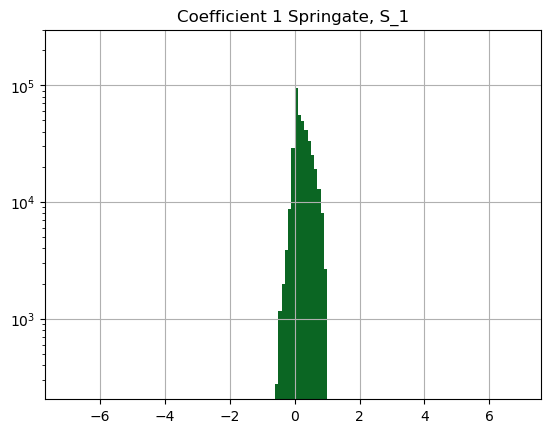

In [80]:
ax = df_Act_Tot_nd_nooutliers['Coef1_Springate'].hist(bins=z1,color='#0B6623').set_title("Coefficient 1 Springate, S_1")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(4328.921577686266, 300000)

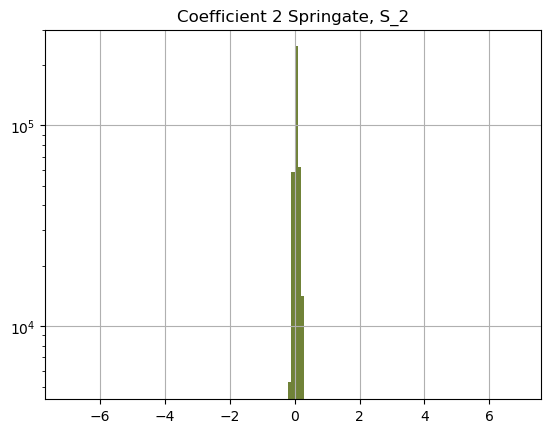

In [81]:
ax = df_Act_Tot_nd_nooutliers['Coef2_Springate'].hist(bins=z1,color='#708238').set_title("Coefficient 2 Springate, S_2")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(405.9401249144946, 300000)

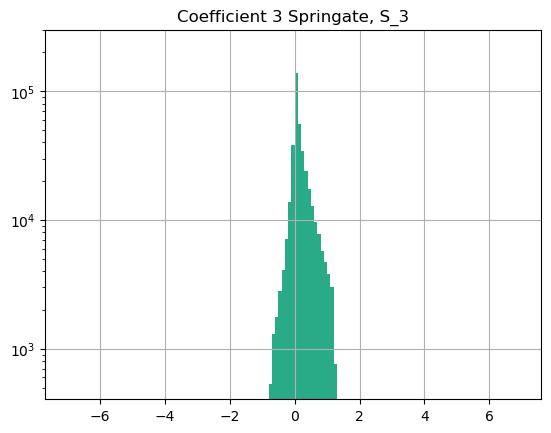

In [82]:
ax = df_Act_Tot_nd_nooutliers['Coef3_Springate'].hist(bins=z1,color='#29AB87').set_title("Coefficient 3 Springate, S_3")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(624.5260585941824, 300000)

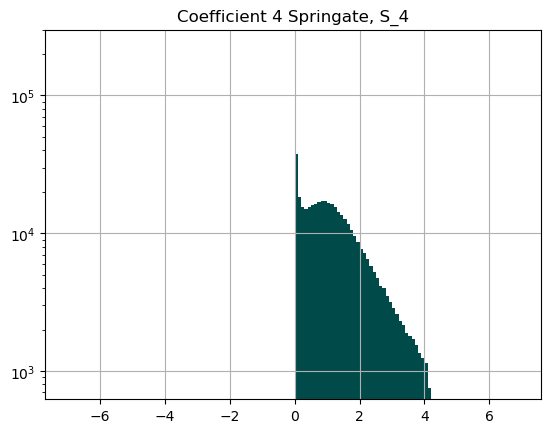

In [83]:
ax = df_Act_Tot_nd_nooutliers['Coef4_Springate'].hist(bins=z1,color='#004B49').set_title("Coefficient 4 Springate, S_4")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(585.5829884896805, 300000)

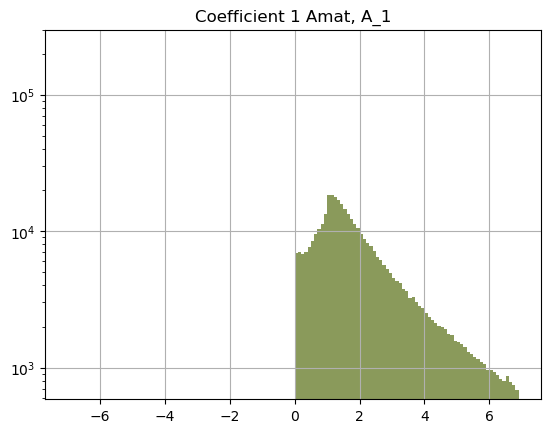

In [84]:
ax = df_Act_Tot_nd_nooutliers['Coef1_Amat'].hist(bins=z1,color='#8A9A5B').set_title("Coefficient 1 Amat, A_1")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(943.1165116225434, 300000)

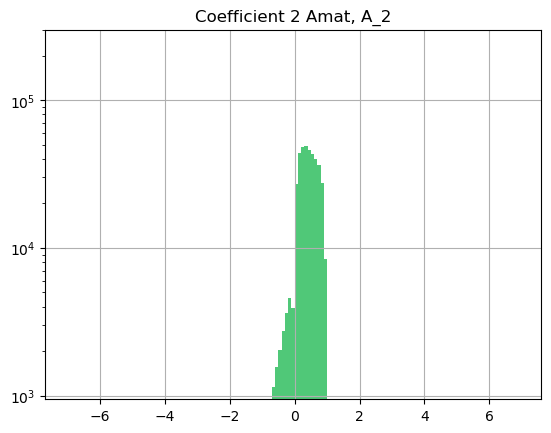

In [85]:
ax = df_Act_Tot_nd_nooutliers['Coef2_Amat'].hist(bins=z1,color='#50C878').set_title("Coefficient 2 Amat, A_2")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(1004.5380992817909, 300000)

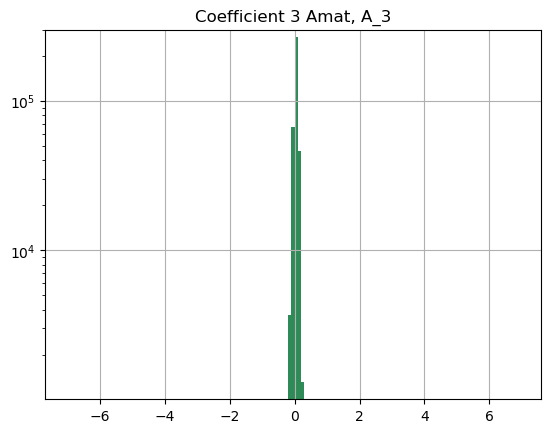

In [86]:
ax = df_Act_Tot_nd_nooutliers['Coef3_Amat'].hist(bins=z1,color='#2E8B57').set_title("Coefficient 3 Amat, A_3")
plt.yscale("log")
plt.ylim(0, 300000)

C:\Users\inima\anaconda3\envs\lamda_ssl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(952.9349980350653, 300000)

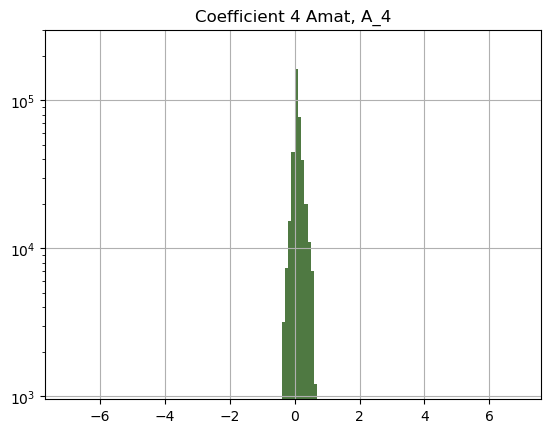

In [87]:
ax = df_Act_Tot_nd_nooutliers['Coef4_Amat'].hist(bins=z1,color='#4F7942').set_title("Coefficient 4 Amat, A_4")
plt.yscale("log")
plt.ylim(0, 300000)